In [132]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression as Lgr
from sklearn.utils import resample#fownsample the dataset
from sklearn.preprocessing import scale#scale and center data for svm
from sklearn.decomposition import PCA 
from sklearn.svm import SVC# support vecter machine for classification
from sklearn.tree import DecisionTreeClassifier# to build a classification tree
from sklearn.tree import plot_tree#to draw a classification tree
from sklearn.ensemble import RandomForestClassifier#rvm
from sklearn.inspection import permutation_importance#variance importance plot
from sklearn.model_selection import cross_val_score#for cross validation
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
import matplotlib.pyplot as plt#EDA plots
import matplotlib.colors as colors
import seaborn as sns#heatmap
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

In [16]:
df = pd.read_csv('G:/spambase.csv')
df.head()
#df.dtypes


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_sb,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [17]:
corrmat = df.corr()
#corrmat# check variables pairs which have correlations>0.85 and drop one of them


In [18]:
cols = corrmat.index
'''''''''''
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize = (20,15))
sns.heatmap(cm, square=True, annot=False, fmt='.2f', annot_kws={'size': 10}, cbar=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
'''''''''''



"''\ncm = np.corrcoef(df.values.T)\nsns.set(font_scale=1.5)\nplt.figure(figsize = (20,15))\nsns.heatmap(cm, square=True, annot=False, fmt='.2f', annot_kws={'size': 10}, cbar=True, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()\n"

In [19]:
df.drop('word_freq_857', axis=1, inplace=True)
df.drop('word_freq_direct', axis=1, inplace=True)


In [40]:
stratify = sum(y)/(len(y)-sum(y))


40% of emails in the dataset is spam so we will use stratification split 
to maintain the same percentage of spam emails in both the **training** set and the **testing** set.
sum(y)/len(y)
sum(y_train)/len(y_train)
sum(y_test)/len(y_test)
double check to make sure the proportions are the same


In [20]:
X = df.drop('spam', axis = 1).copy()
y = df['spam'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


In [21]:
X_train.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 

In [246]:
clf_lgr = Lgr(random_state = 0).fit(X_train, y_train)



array([[39, 28, 26, 25, 24, 31, 33, 37, 43, 42, 41, 29, 35, 38, 27, 30,
        46, 45, 48, 40,  1, 32, 36, 34, 47, 44, 52, 11, 18, 54, 23, 22,
        21, 20, 19, 17, 16, 15, 14, 13, 12, 10,  9,  8,  7,  6,  5,  4,
         3, 49, 50, 51,  2, 53,  0]], dtype=int64)

In [22]:
clf_xgbd = xgb.XGBClassifier(objective = 'binary:logistic', seed = 1)
clf_xgbd.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

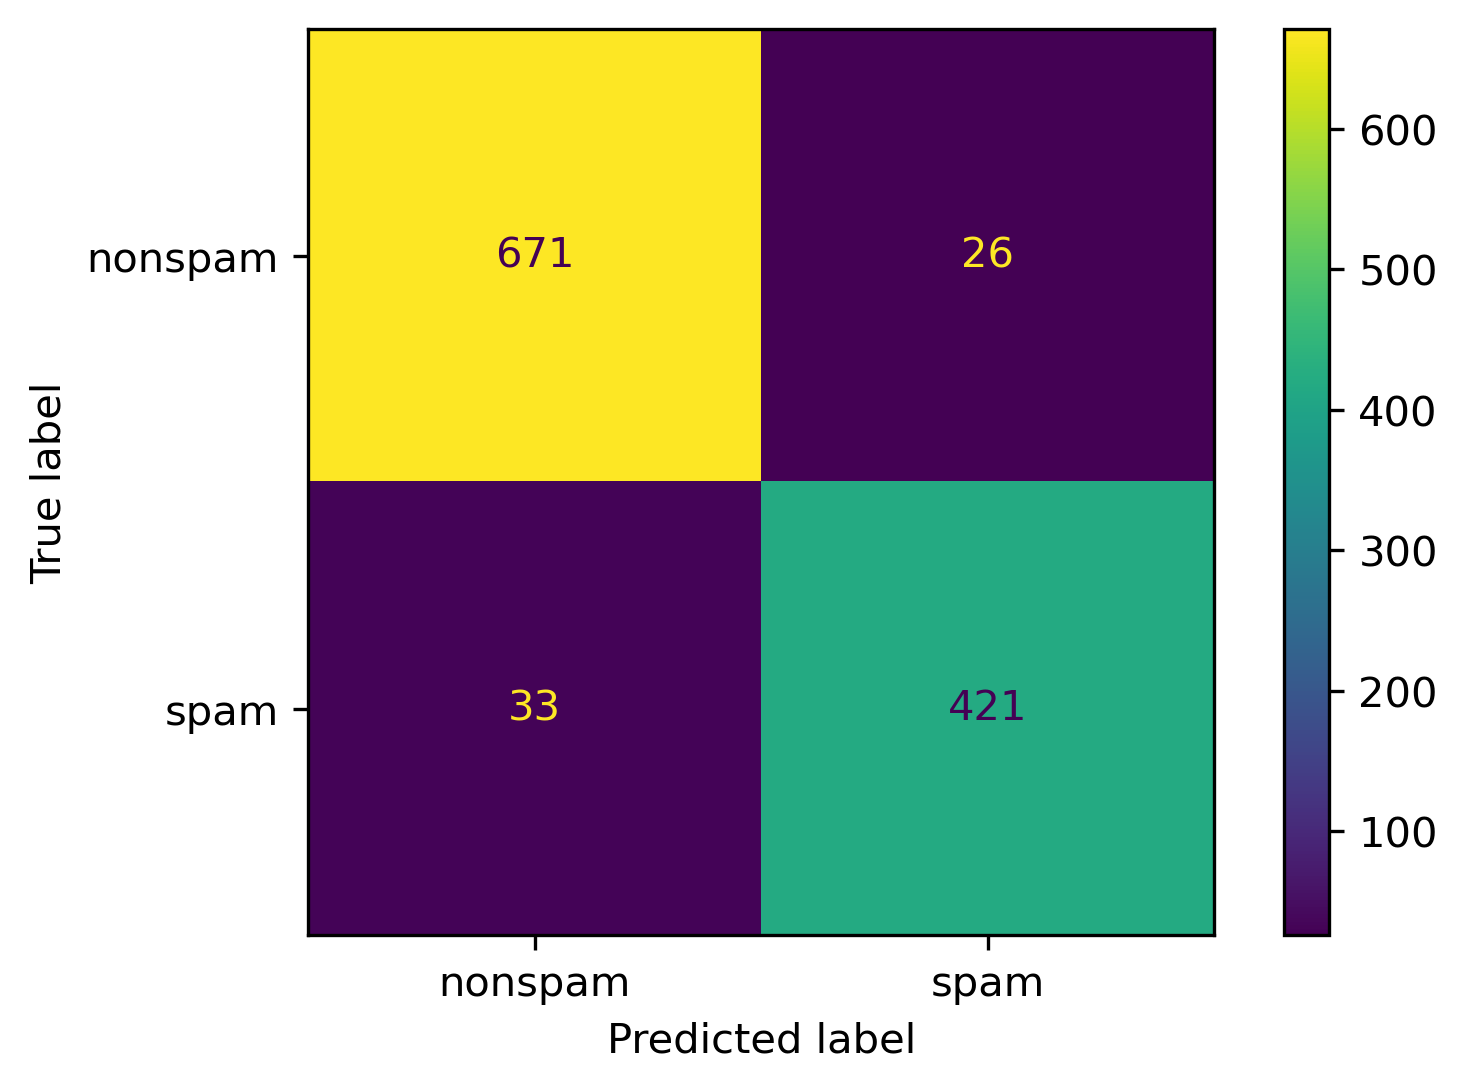

In [49]:
plot_confusion_matrix(clf_xgbd, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["nonspam", "spam"])


In [44]:
'''''''''''
param_grid = {'max_depth': [5, 10, 15], 'learning_rate': np.linspace(0.1, 0.5, 5),
              'gamma': [0, 0.2, 0.4], 'reg_lambda': np.linspace(0,5,5)}
'''''''''''        


param_grid = {'max_depth': [15, 20, 25], 'learning_rate': [0.2, 0.3, 0.4],
              'gamma': [0,0.2,0.4] , 'reg_lambda': np.linspace(2.5, 5,4), 'scale_pos_weight': [stratify] }




In [45]:
optimal_params = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                                            subsample=0.9, colsample_bytree=0.5,
                                                             seed = 1),
                              param_grid = param_grid,scoring ='roc_auc', verbose = 2, n_jobs = 10,cv = 3 )



In [46]:
optimal_params.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='aucpr', 
                   eval_set=[(X_test, y_test)], verbose=False)
print(optimal_params.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done 324 out of 324 | elapsed:   15.8s finished


{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 20, 'reg_lambda': 2.5, 'scale_pos_weight': 0.650286944045911}


In [47]:
clf_xgb = xgb.XGBClassifier(seed=1,
                        objective='binary:logistic',
                        gamma=0,
                        learn_rate=0.3,
                        max_depth=20,
                        reg_lambda=2.5,
                        scale_pos_weight = sum(y)/(len(y)-sum(y))
                        )
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])



[16:21:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.92783
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.94013
[2]	validation_0-aucpr:0.94736
[3]	validation_0-aucpr:0.94828
[4]	validation_0-aucpr:0.95861
[5]	validation_0-aucpr:0.96178
[6]	validation_0-aucpr:0.96527
[7]	validation_0-aucpr:0.96985
[8]	validation_0-aucpr:0.97122
[9]	validation_0-aucpr:0.97352
[10]	validation_0-aucpr:0.97391
[11]	validation_0-aucpr:0.97606
[12]	validation_0-aucpr:0.97671
[13]	validation_0-aucpr:0.97783
[14]	validation_0-aucpr:0.97834
[15]	validation_0-aucpr:0.97849
[16]	validation_0-aucpr:0.97833
[17]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.3, learning_rate=0.300000012, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=2.5,
              scale_pos_weight=0.650286944045911, seed=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

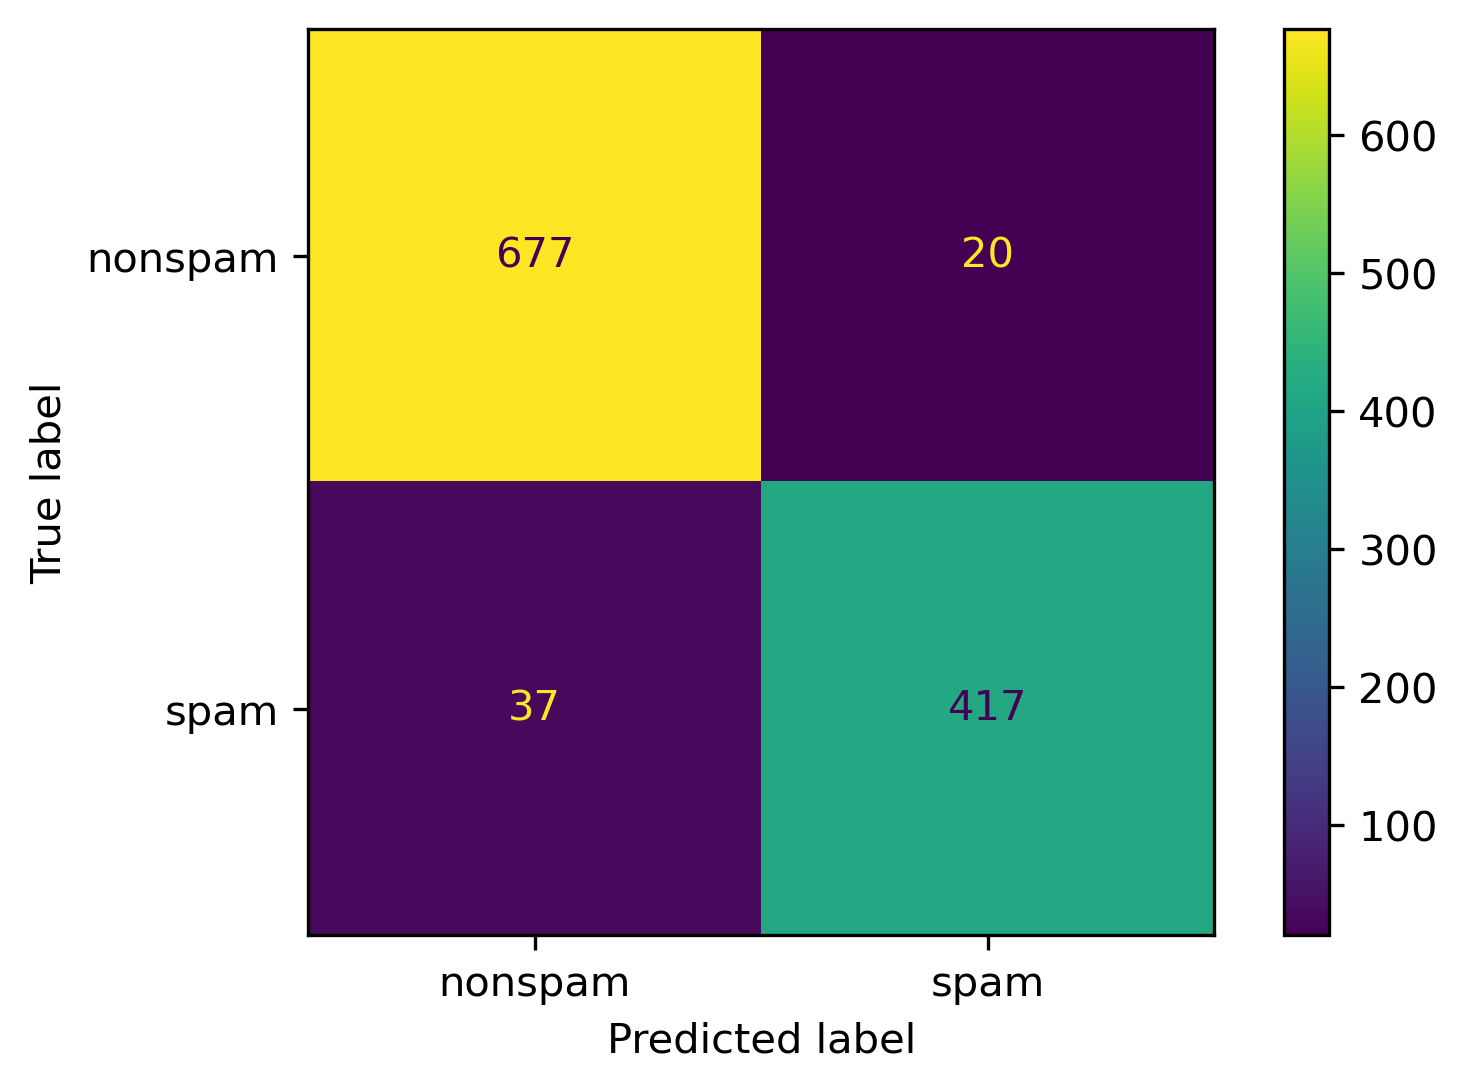

In [50]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["nonspam", "spam"])


In [51]:
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box', ## make the nodes fancy
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'} 
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}


weight:  {'char_freq_$': 38, 'word_freq_remove': 33, 'char_freq_!': 126, 'word_freq_free': 60, 'word_freq_money': 18, 'word_freq_font': 3, 'word_freq_000': 17, 'word_freq_internet': 41, 'capital_run_length_total': 180, 'word_freq_over': 26, 'word_freq_our': 63, 'char_freq_;': 18, 'word_freq_your': 112, 'word_freq_all': 48, 'word_freq_receive': 19, 'word_freq_data': 11, 'word_freq_business': 28, 'capital_run_length_average': 195, 'word_freq_email': 39, 'word_freq_re': 58, 'word_freq_pm': 7, 'word_freq_you': 181, 'word_freq_george': 31, 'word_freq_hp': 37, 'word_freq_mail': 39, 'capital_run_length_longest': 128, 'word_freq_edu': 39, 'word_freq_credit': 3, 'char_freq_(': 74, 'word_freq_report': 3, 'word_freq_parts': 2, 'word_freq_people': 17, 'word_freq_will': 84, 'word_freq_technology': 9, 'word_freq_meeting': 18, 'word_freq_hpl': 5, 'word_freq_conference': 1, 'char_freq_#': 14, 'word_freq_make': 13, 'word_freq_order': 8, 'word_freq_address': 6, 'word_freq_1999': 24, 'word_freq_addresses

In [52]:
graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10", 
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

graph_data.view(filename='xgboost_tree_spam')

'xgboost_tree_spam.pdf'

In [53]:
clf_dt1 = DecisionTreeClassifier(random_state = 1)
clf_dt1 = clf_dt1.fit(X_train, y_train)

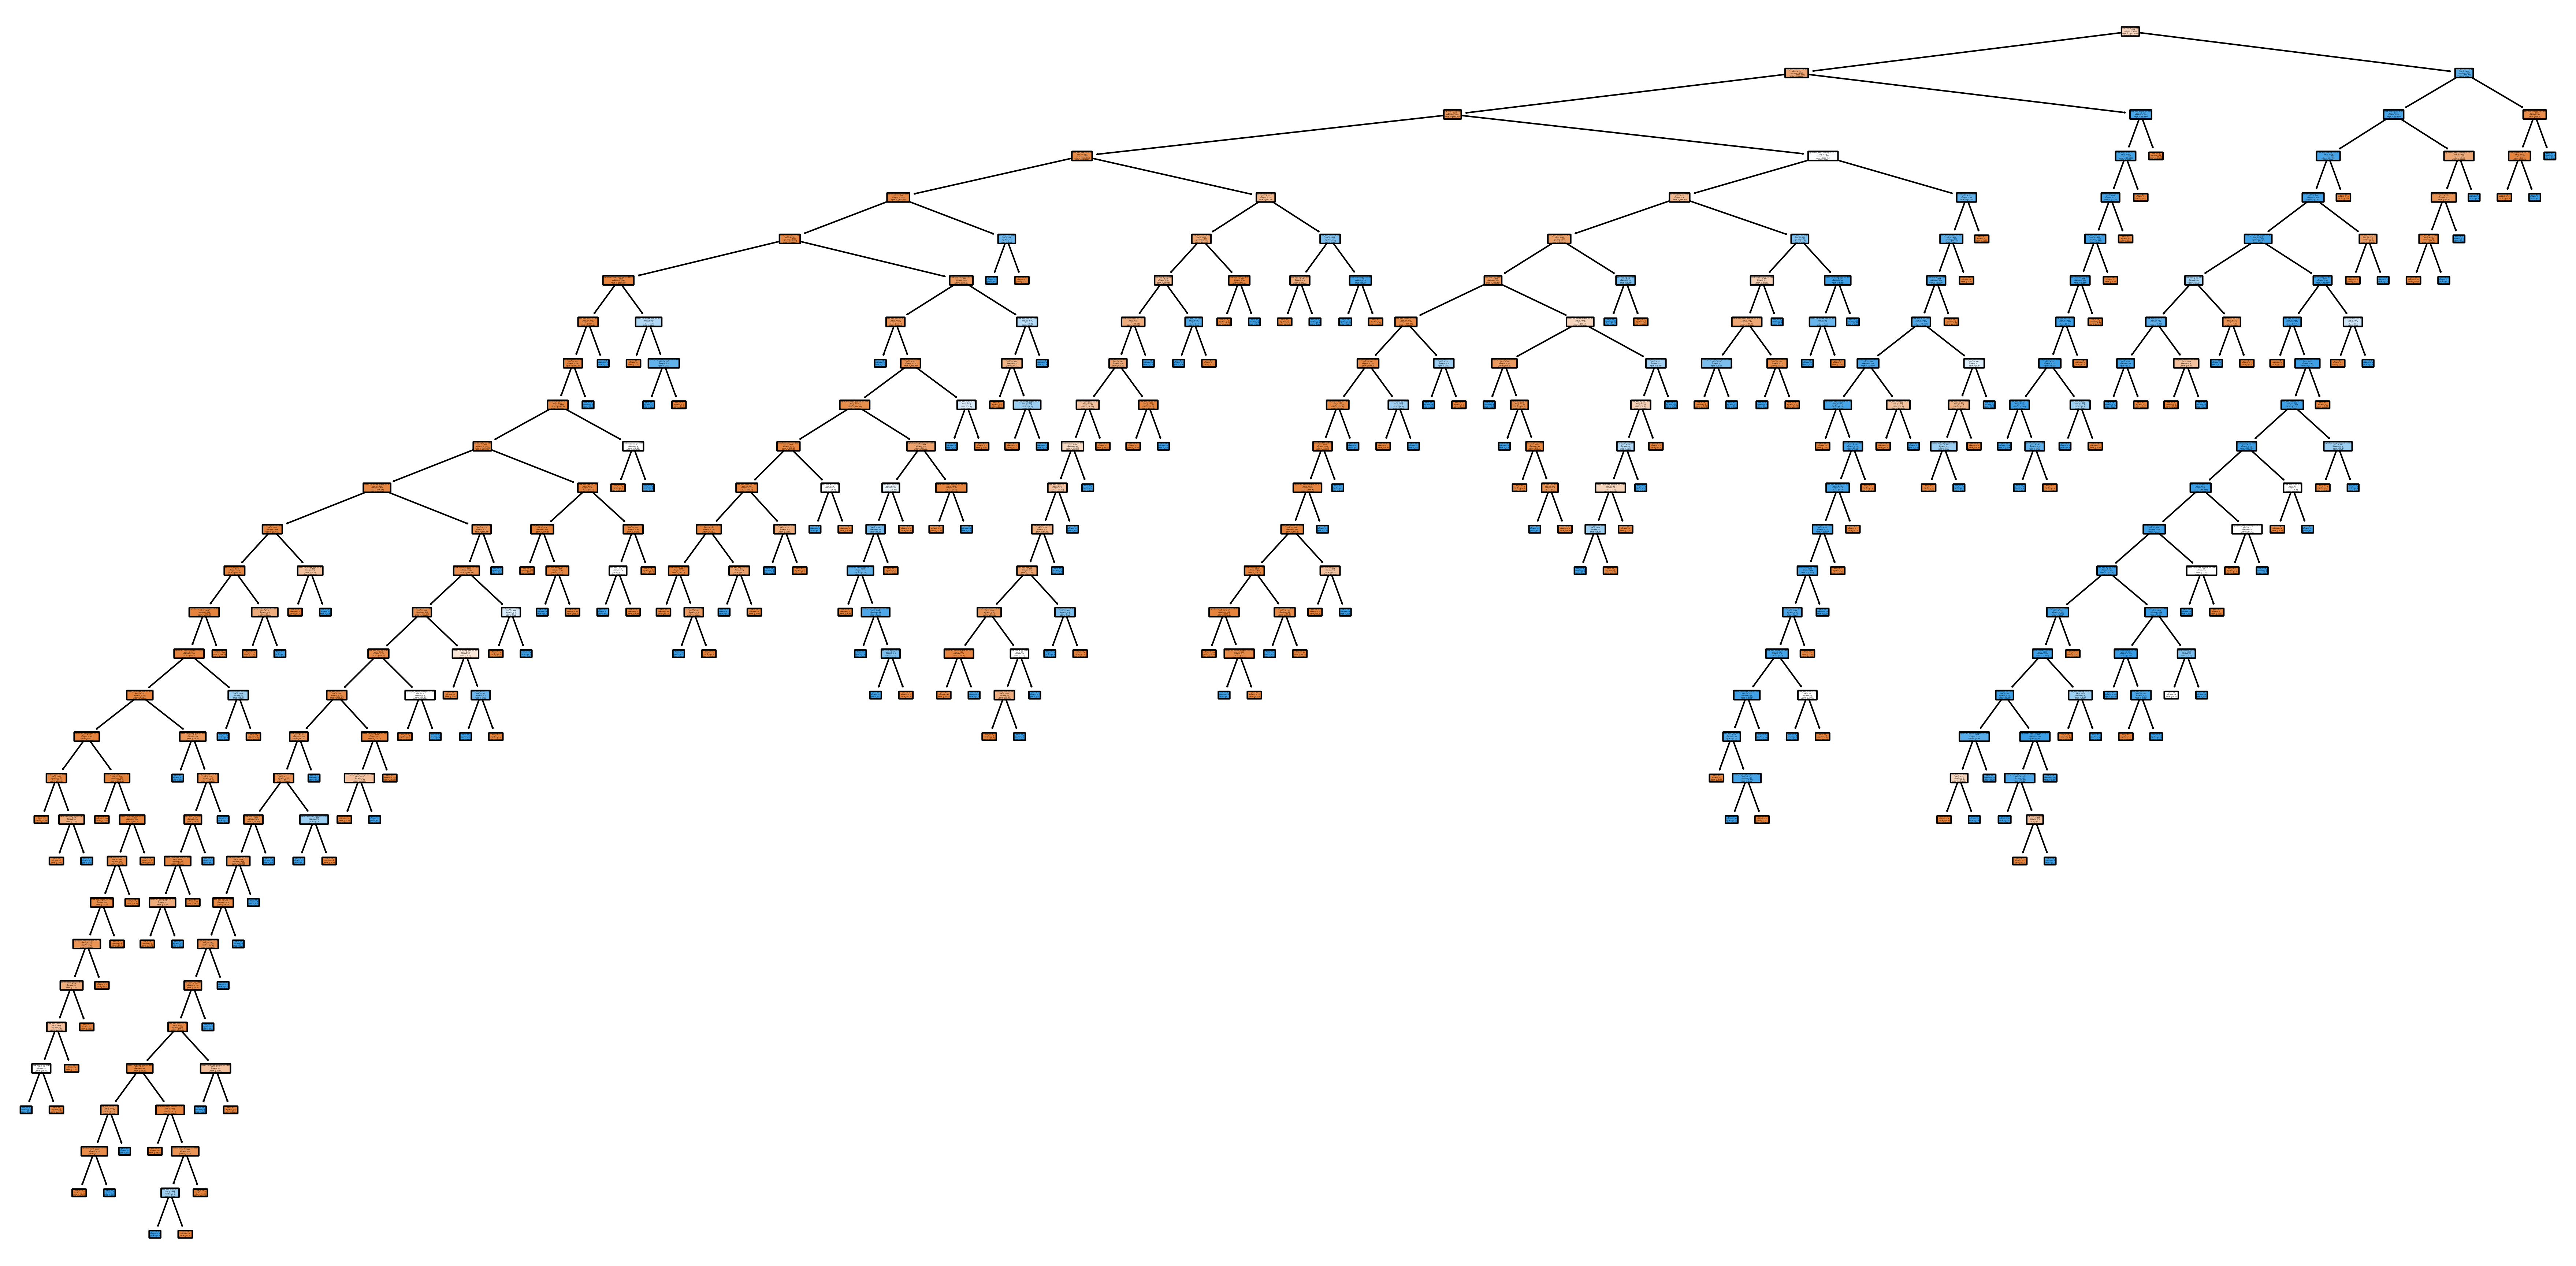

In [54]:
plt.figure(figsize=(30,15))
plot_tree(clf_dt1, filled = True, rounded = True, class_names = ['Nonspam', 'Spam'], feature_names = X.columns )
plt.show()

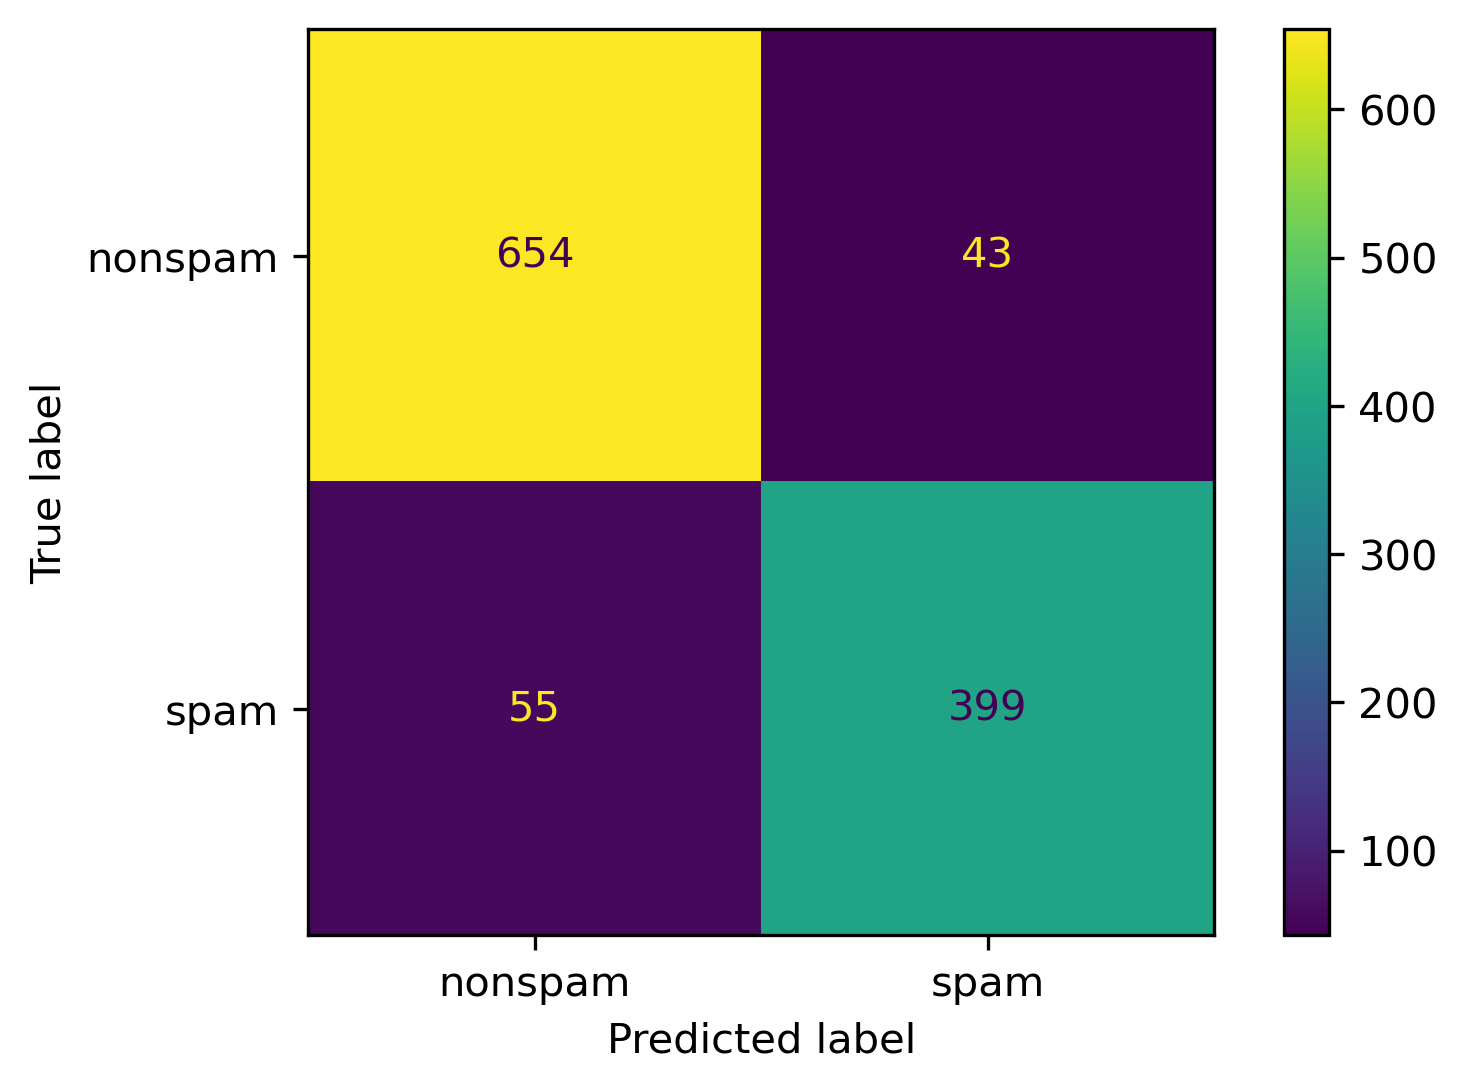

In [55]:
plot_confusion_matrix(clf_dt1, X_test, y_test, display_labels=["nonspam", "spam"])


In [56]:
path = clf_dt1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]#excludethe maximum alpha since it will prune all leaves leaving only a root

In [57]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt1 = DecisionTreeClassifier(random_state = 1, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt1, X_train, y_train, cv = 7)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    


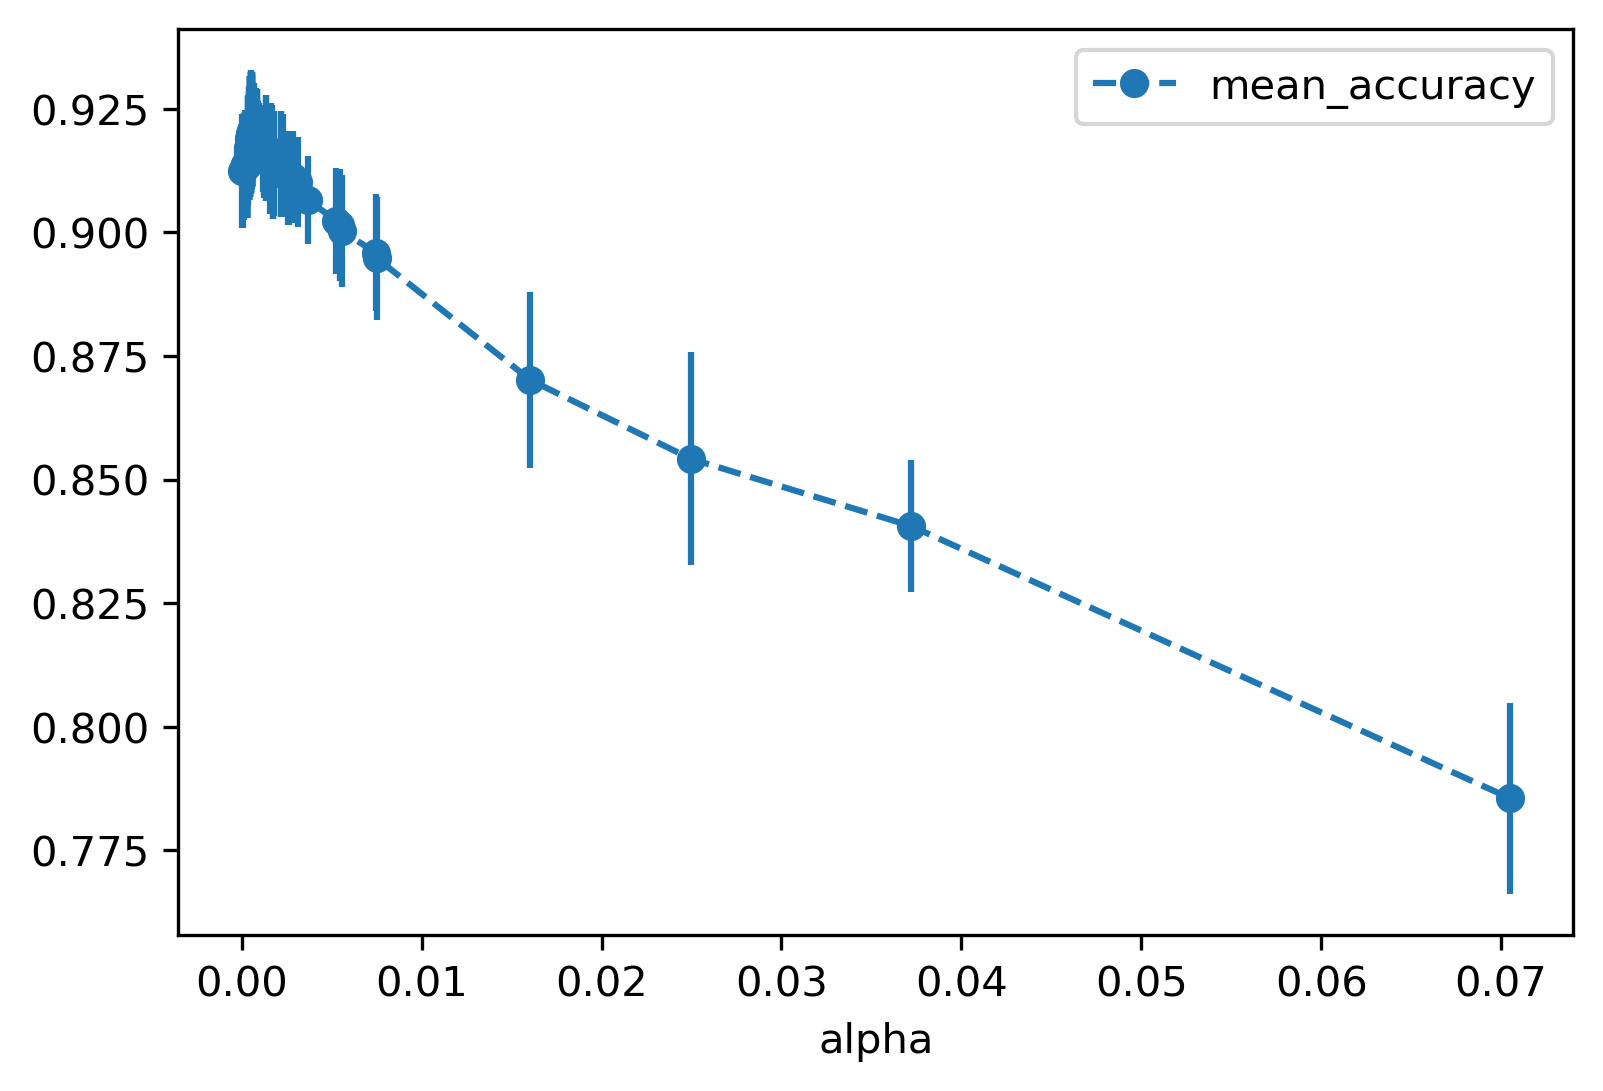

In [58]:
alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'standard deviation'])
alpha_results.plot(x ='alpha', y = 'mean_accuracy', yerr = 'standard deviation', marker = 'o', linestyle = '--')
ideal_alpha = alpha_results.loc[np.argmax(alpha_results['mean_accuracy'])][0]

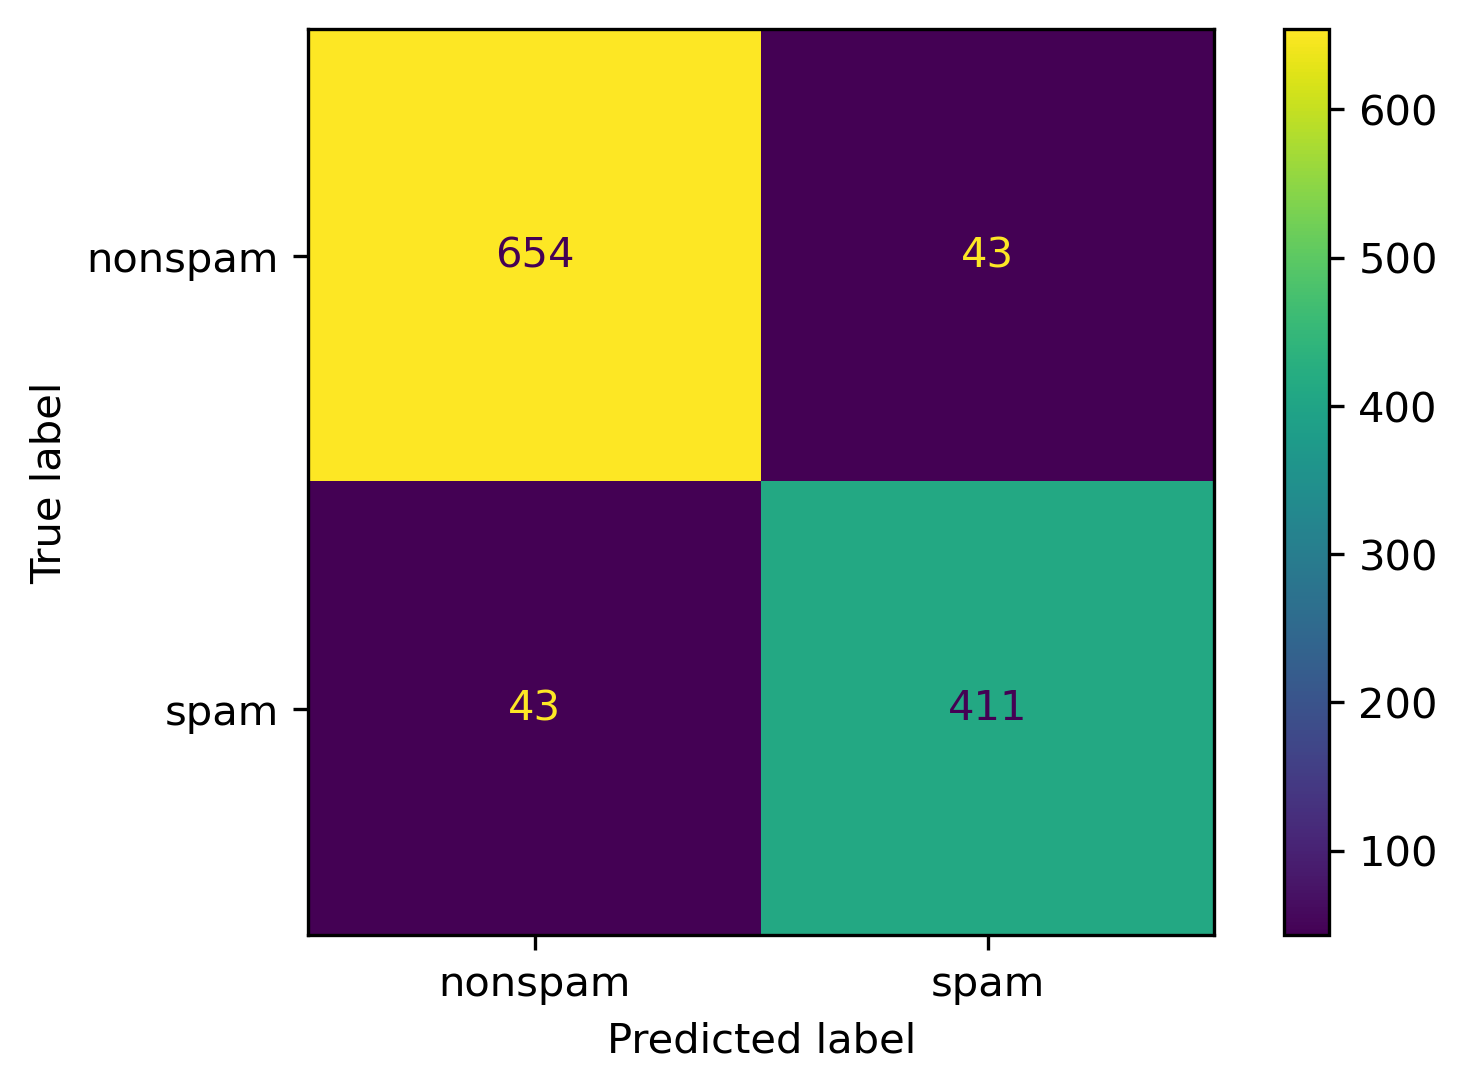

In [59]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 1, ccp_alpha = ideal_alpha)
clf_dt_pruned.fit(X_train, y_train)
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["nonspam", "spam"])

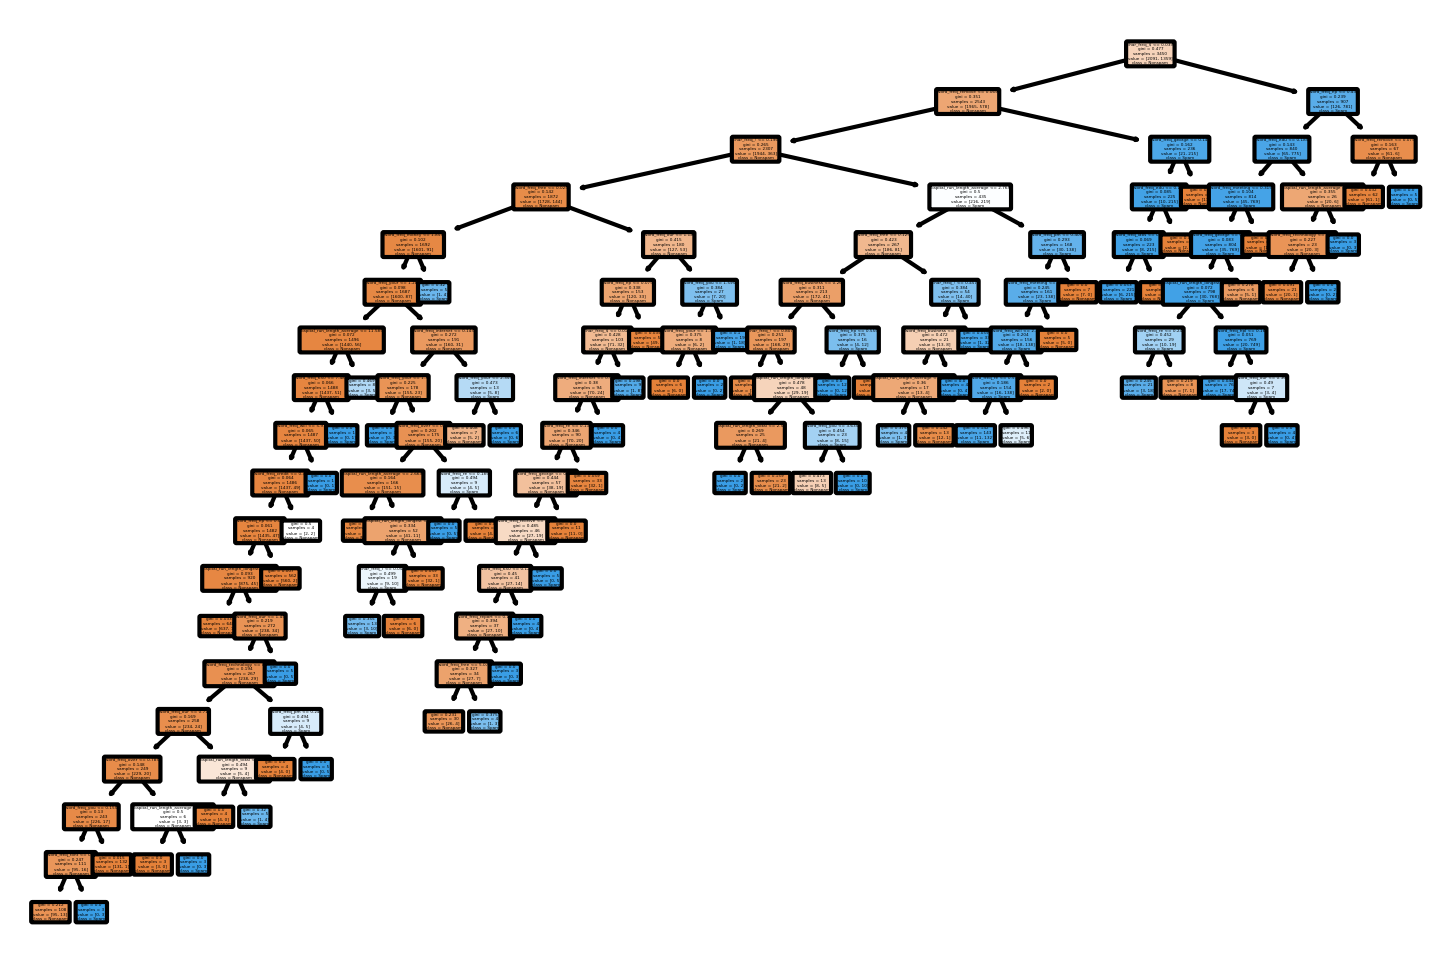

In [60]:
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ['Nonspam', 'Spam'], feature_names = X.columns )
plt.show()

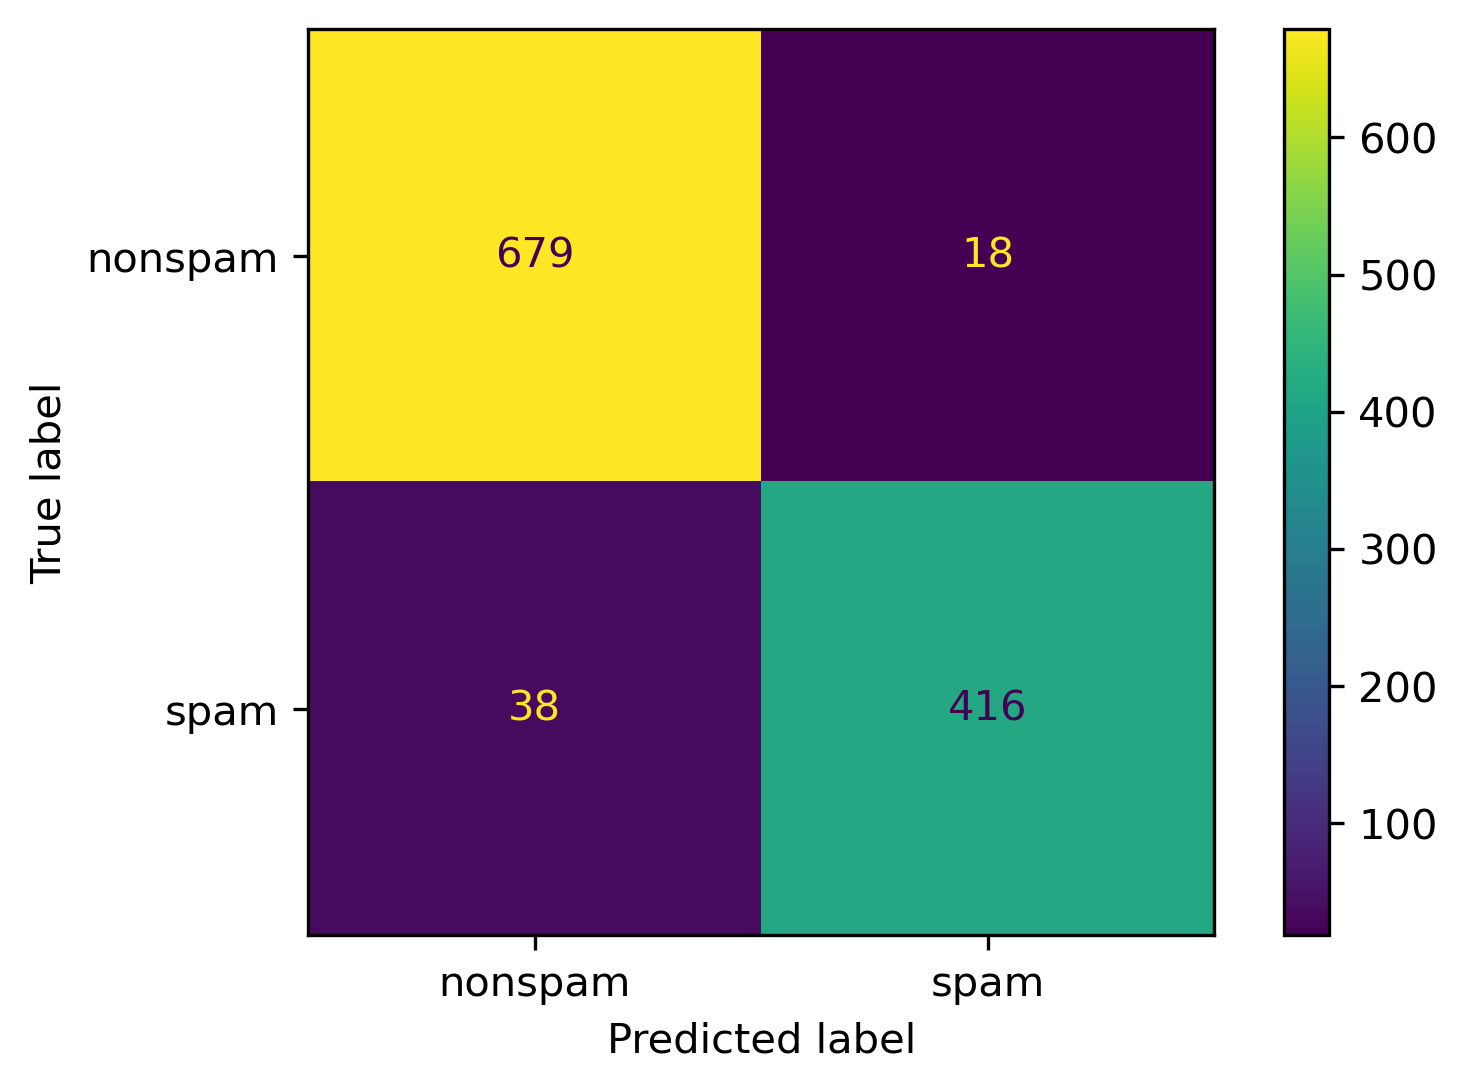

In [61]:
clf_rf = RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train, y_train)
plot_confusion_matrix(clf_rf, X_test, y_test, display_labels=["nonspam", "spam"])

In [62]:
perm_importance = permutation_importance(clf_rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
#overcome drawbacks of default feature importance computed with mean impurity decrease（eliminate the drawback of high cardinality）

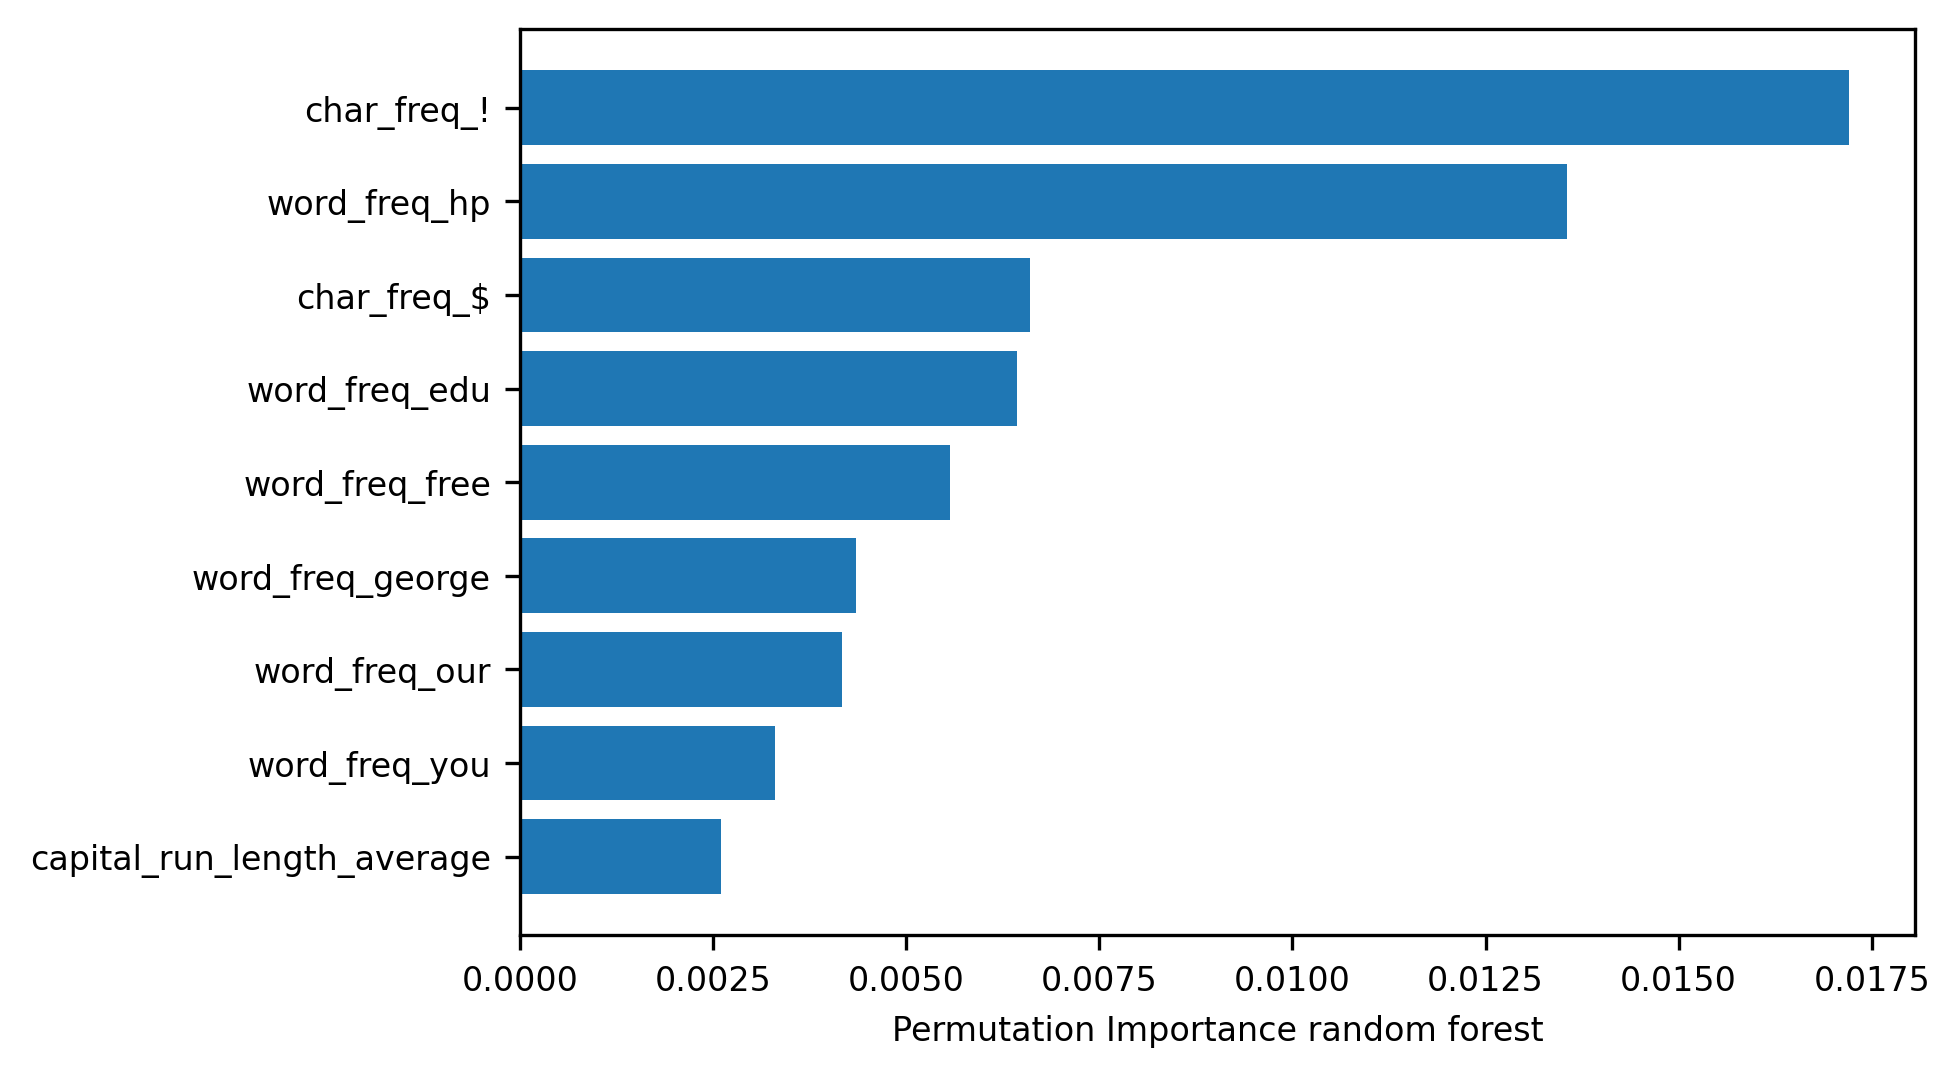

In [72]:
plt.barh(X_test.columns[sorted_idx[-10:-1]], perm_importance.importances_mean[sorted_idx[-10:-1]])
plt.xlabel("Permutation Importance random forest", fontsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.tick_params(axis='x', labelsize=8)

In [73]:
perm_importance = permutation_importance(clf_xgb, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

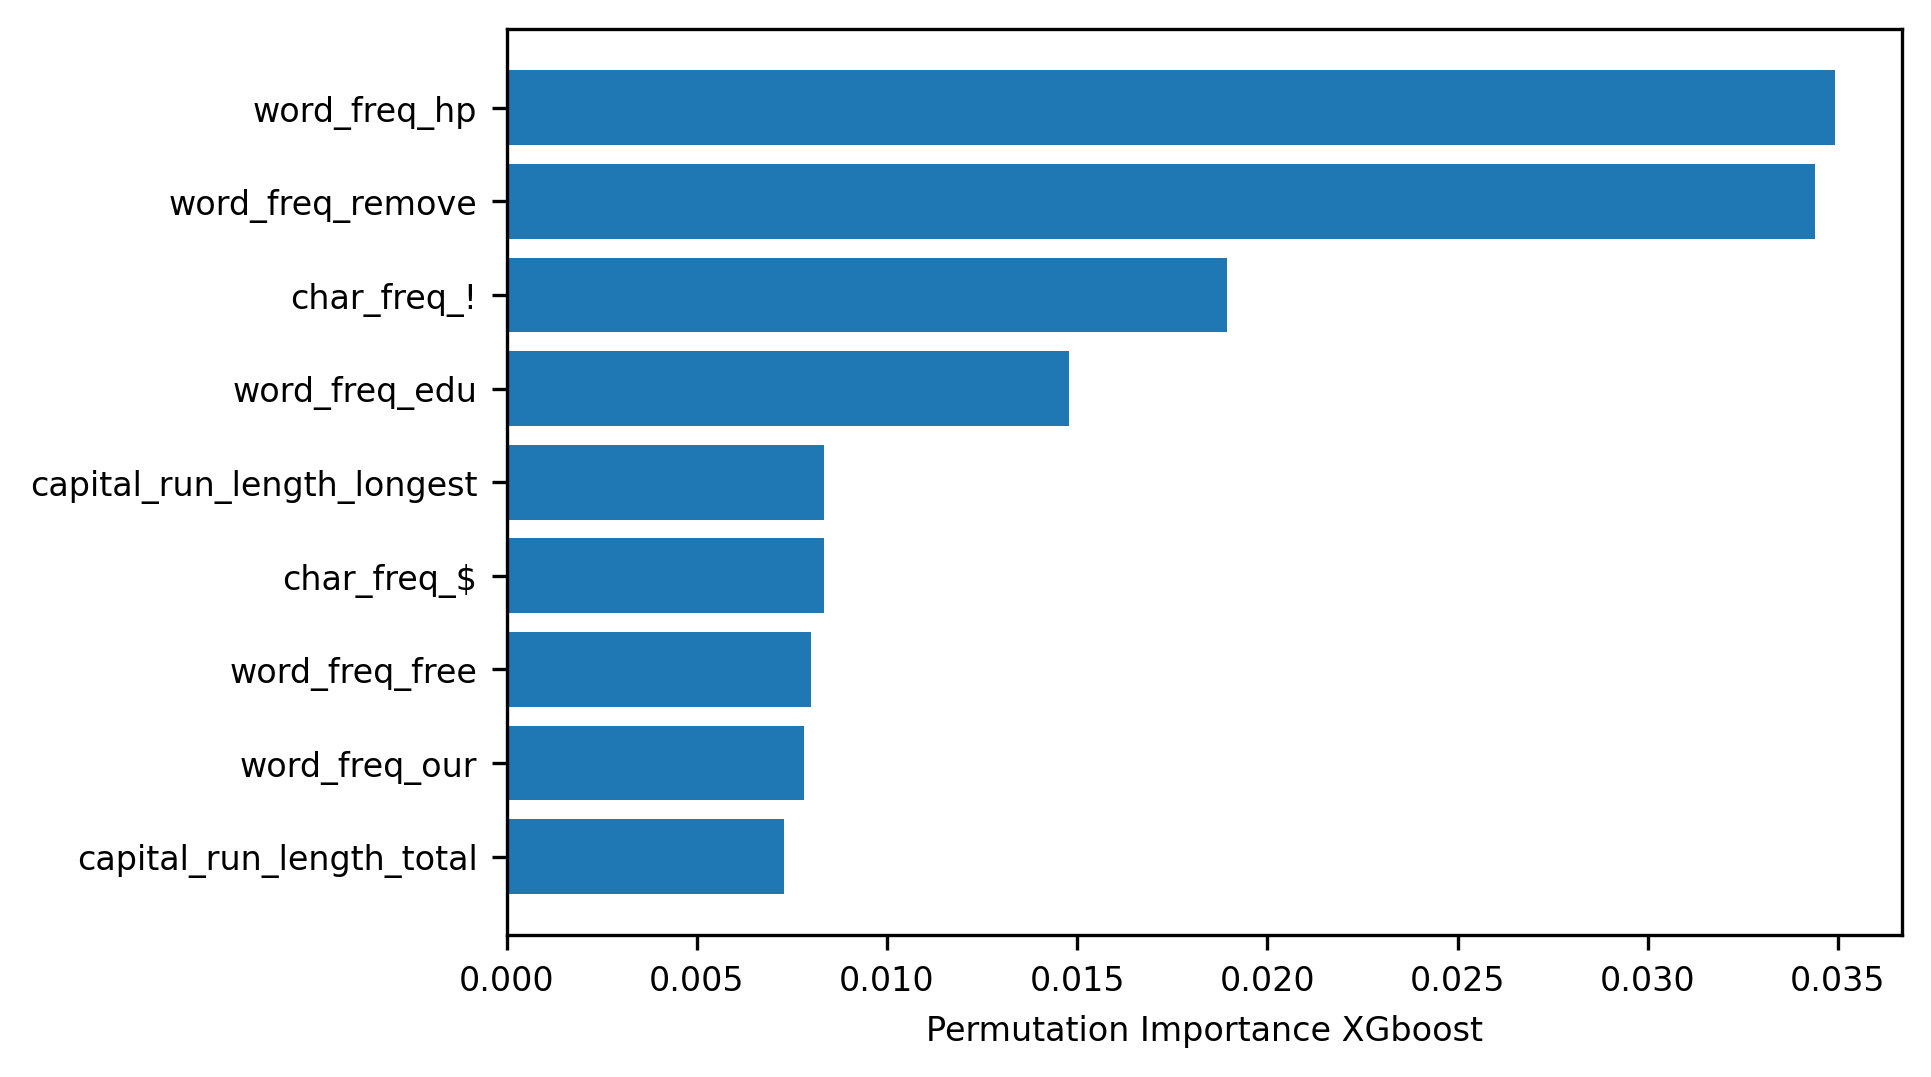

In [74]:
plt.barh(X_test.columns[sorted_idx[-10:-1]], perm_importance.importances_mean[sorted_idx[-10:-1]])
plt.xlabel("Permutation Importance XGboost", fontsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.tick_params(axis='x', labelsize=8)

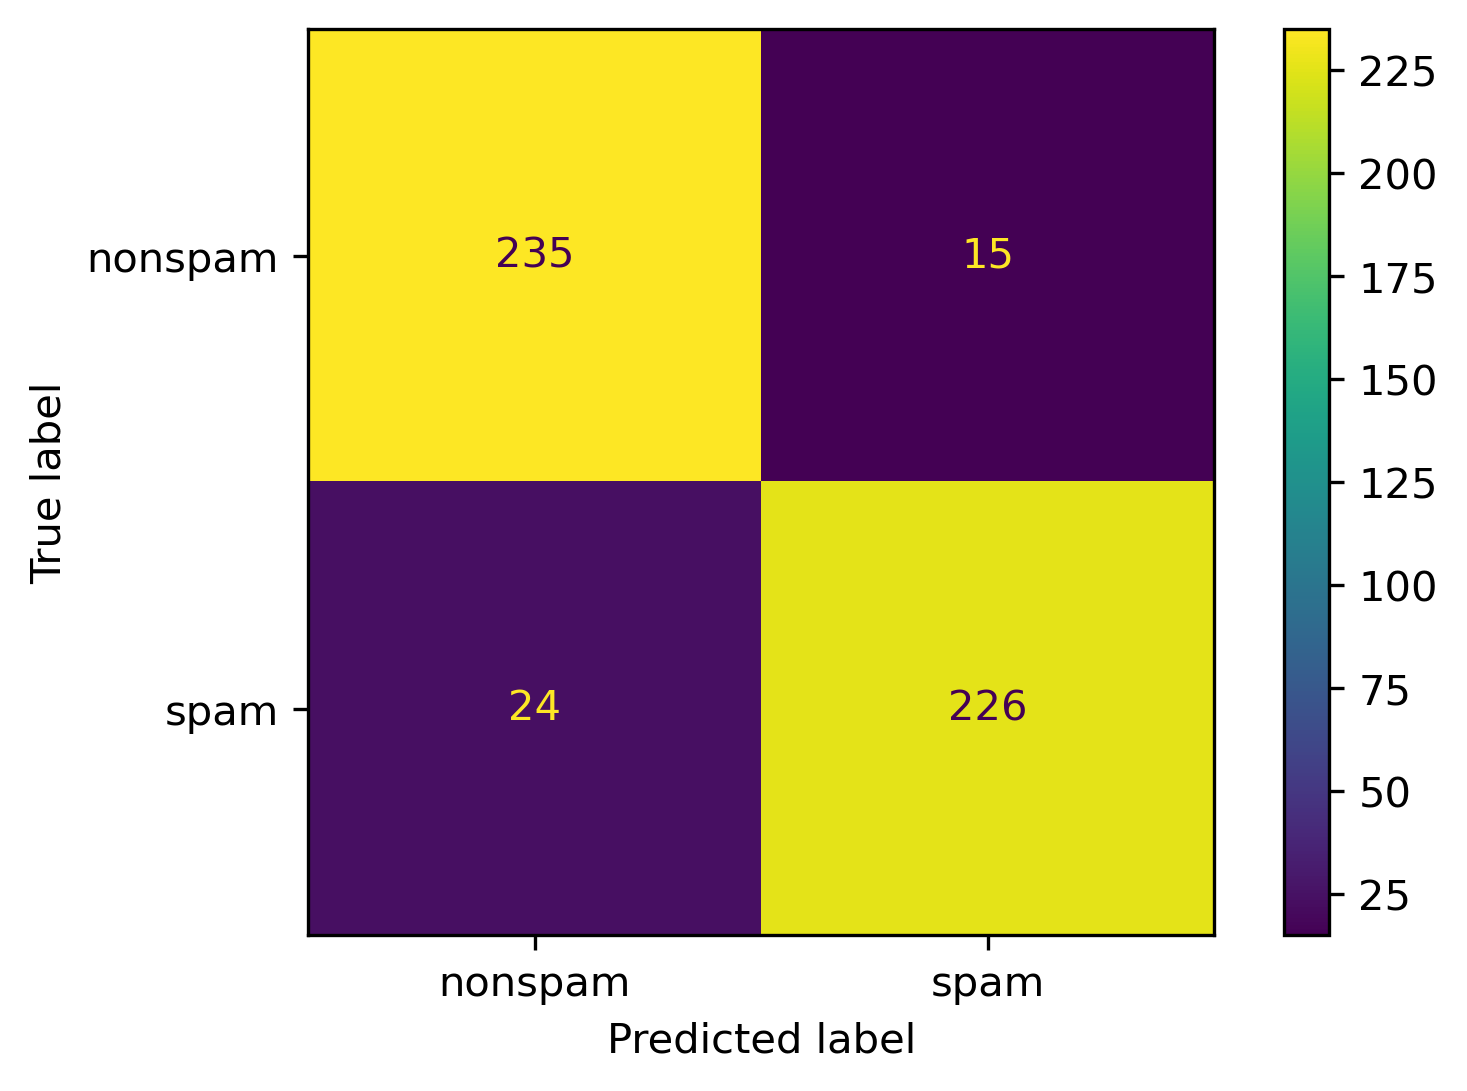

In [82]:
''''''''''
#svm works well for small scaled dataset and our data set is relatively large, so we use downsampling here
df_nonspam = df[df['spam'] == 0]
df_spam = df[df['spam'] == 1]
df_nonspam_downsampled = resample(df_nonspam, replace = False, n_samples = 1000, random_state = 0)
df_spam_downsampled = resample(df_spam, replace = False, n_samples = 1000, random_state = 0)
df_downsample = pd.concat([df_nonspam_downsampled, df_spam_downsampled])

X_svm = df_downsample.drop('spam', axis = 1).copy()
y_svm = df_downsample['spam']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_svm, y_svm, random_state=1, stratify=y_svm)
X_train_scaled = scale(X_train1)
X_test_scaled = scale(X_test1)#mean 0, var = 1
clf_svm = SVC(random_state = 0, kernel = 'rbf')
clf_svm.fit(X_train_scaled, y_train1)

plot_confusion_matrix(clf_svm, X_test_scaled, y_test1, display_labels=["nonspam", "spam"])

#false_negative = 3/50 = 0.06>0.032, accuracy = 461/500 = 0.922<0.937

'''''''''''


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

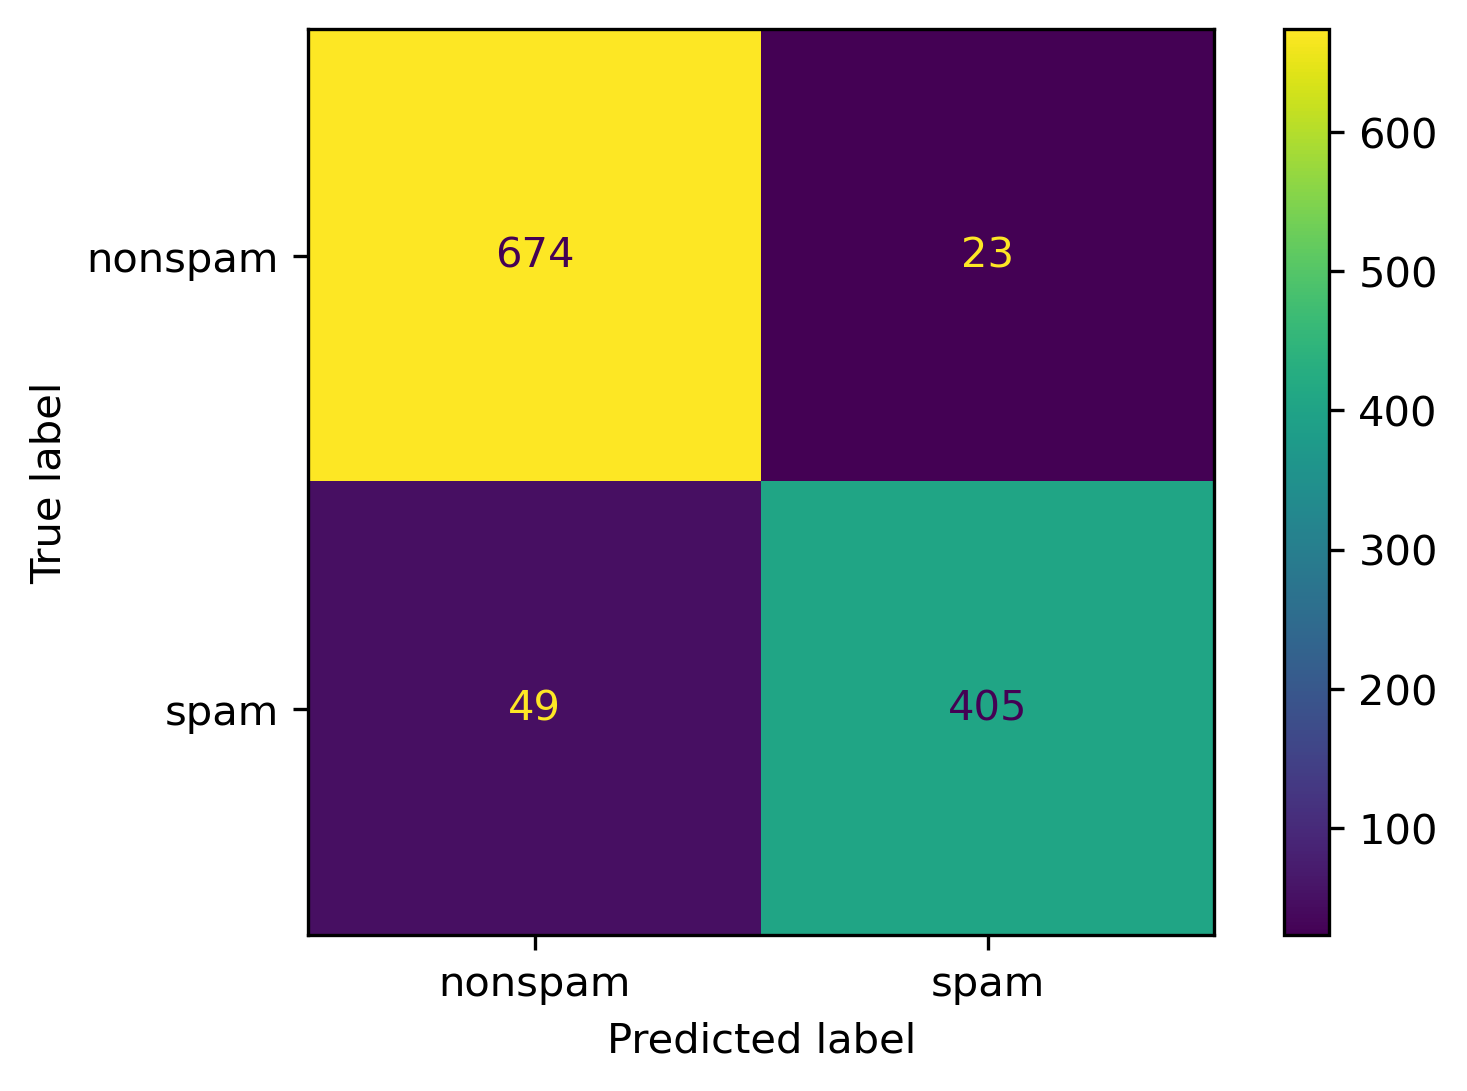

In [88]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)#mean 0, var = 1
clf_svm1 = SVC(random_state = 0, kernel = 'rbf')
clf_svm1.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm1, X_test_scaled, y_test, display_labels=["nonspam", "spam"])
clf_svm1.get_params()

In [89]:
param_grid = [{'C':[0.5, 1,10, 100], 'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}]


In [95]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)#roc_auc not good because accuracy decreased and FP increased

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

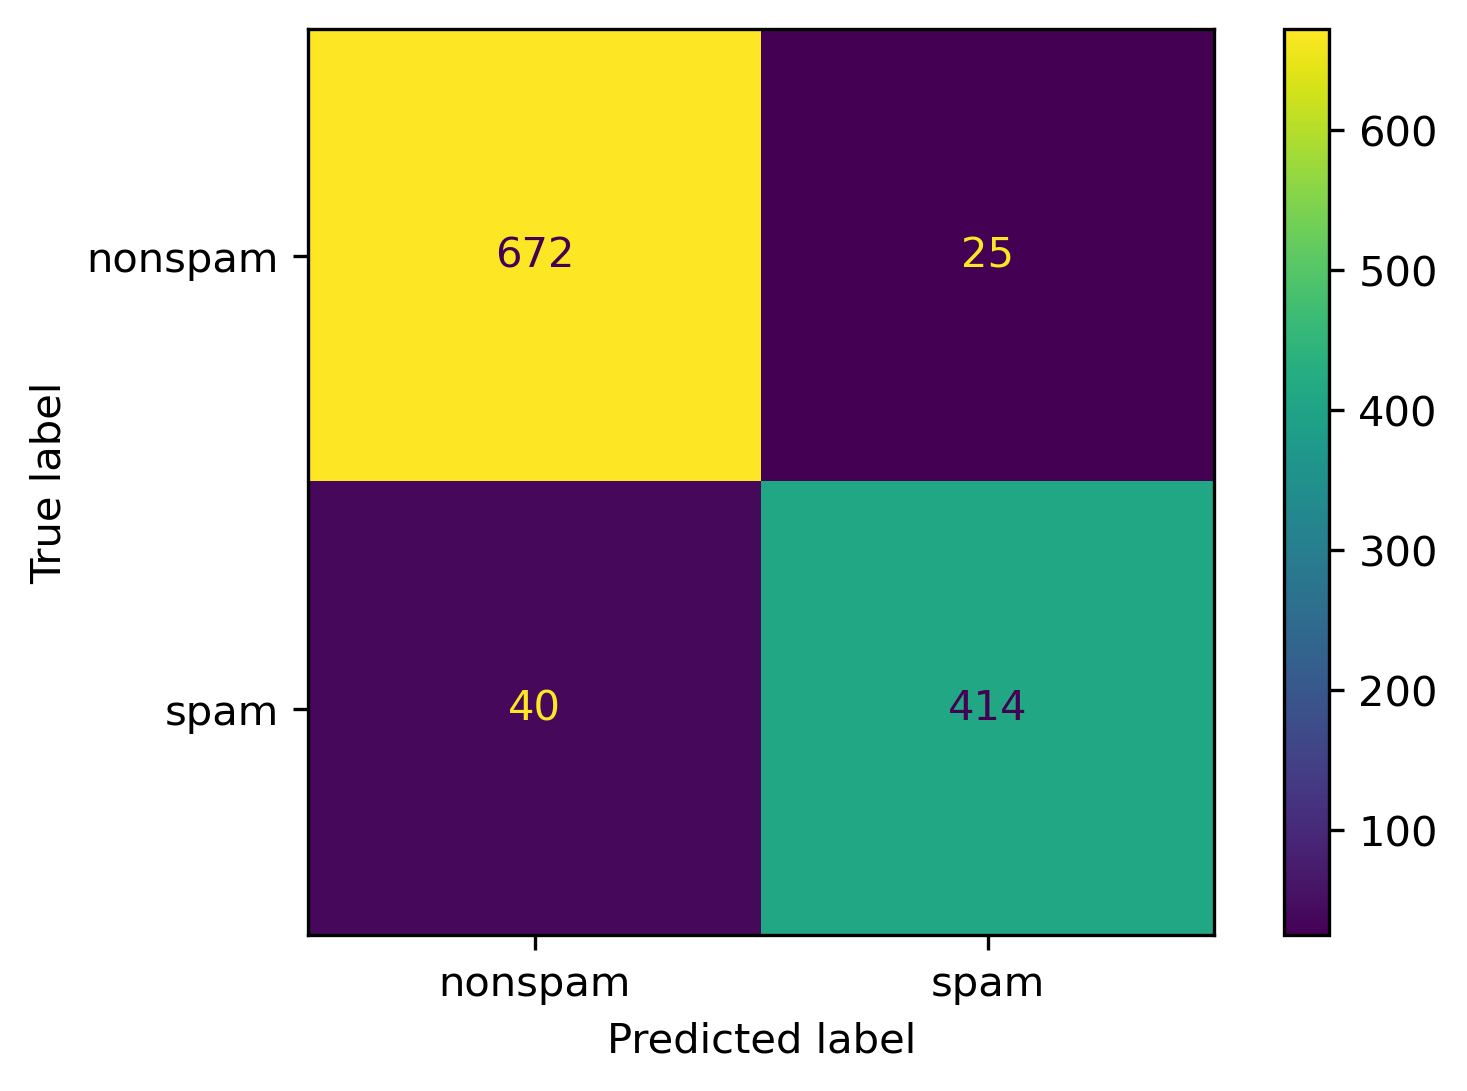

In [99]:
clf_svm = SVC(random_state = 0, kernel = 'rbf', C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=["nonspam", "spam"])
clf_svm.get_params()

In [101]:
len(df.columns)#PCA combine the 56 features into 2 orthogonal meta-features

56

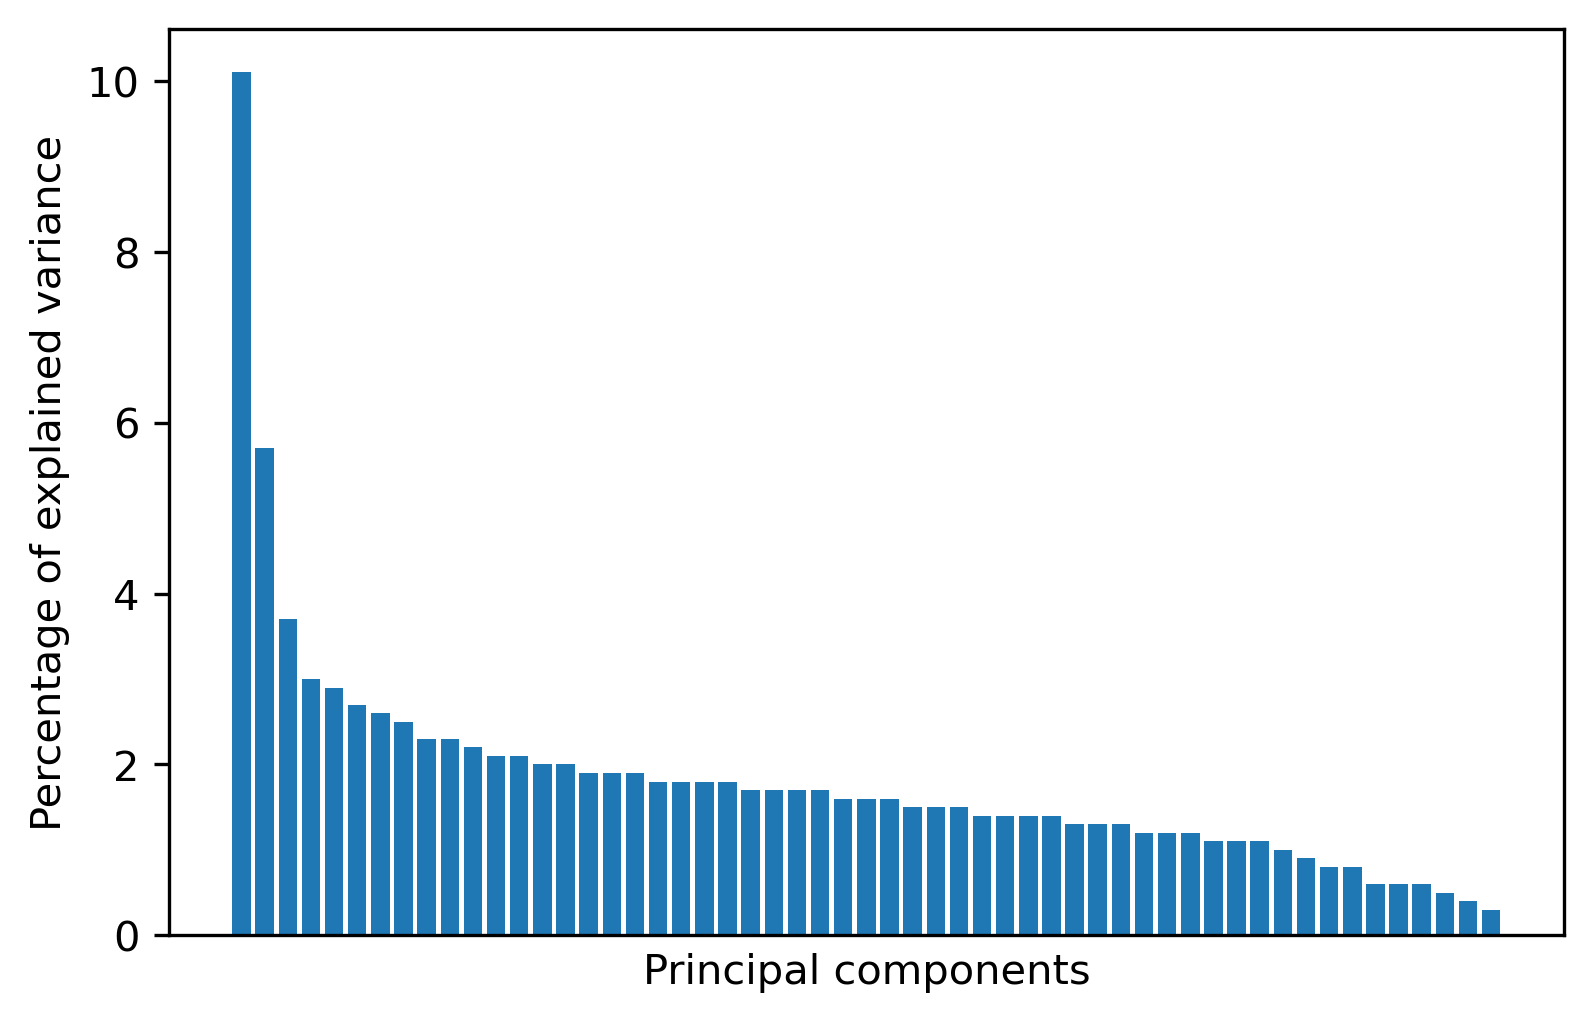

In [104]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x = range(1, len(per_var)+1), height = per_var)
plt.tick_params(
    axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal components')
plt.show()



In [105]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

In [106]:
optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [107]:
clf_svm = SVC(random_state=1, C=1000, gamma=1)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

In [109]:
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))
## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)

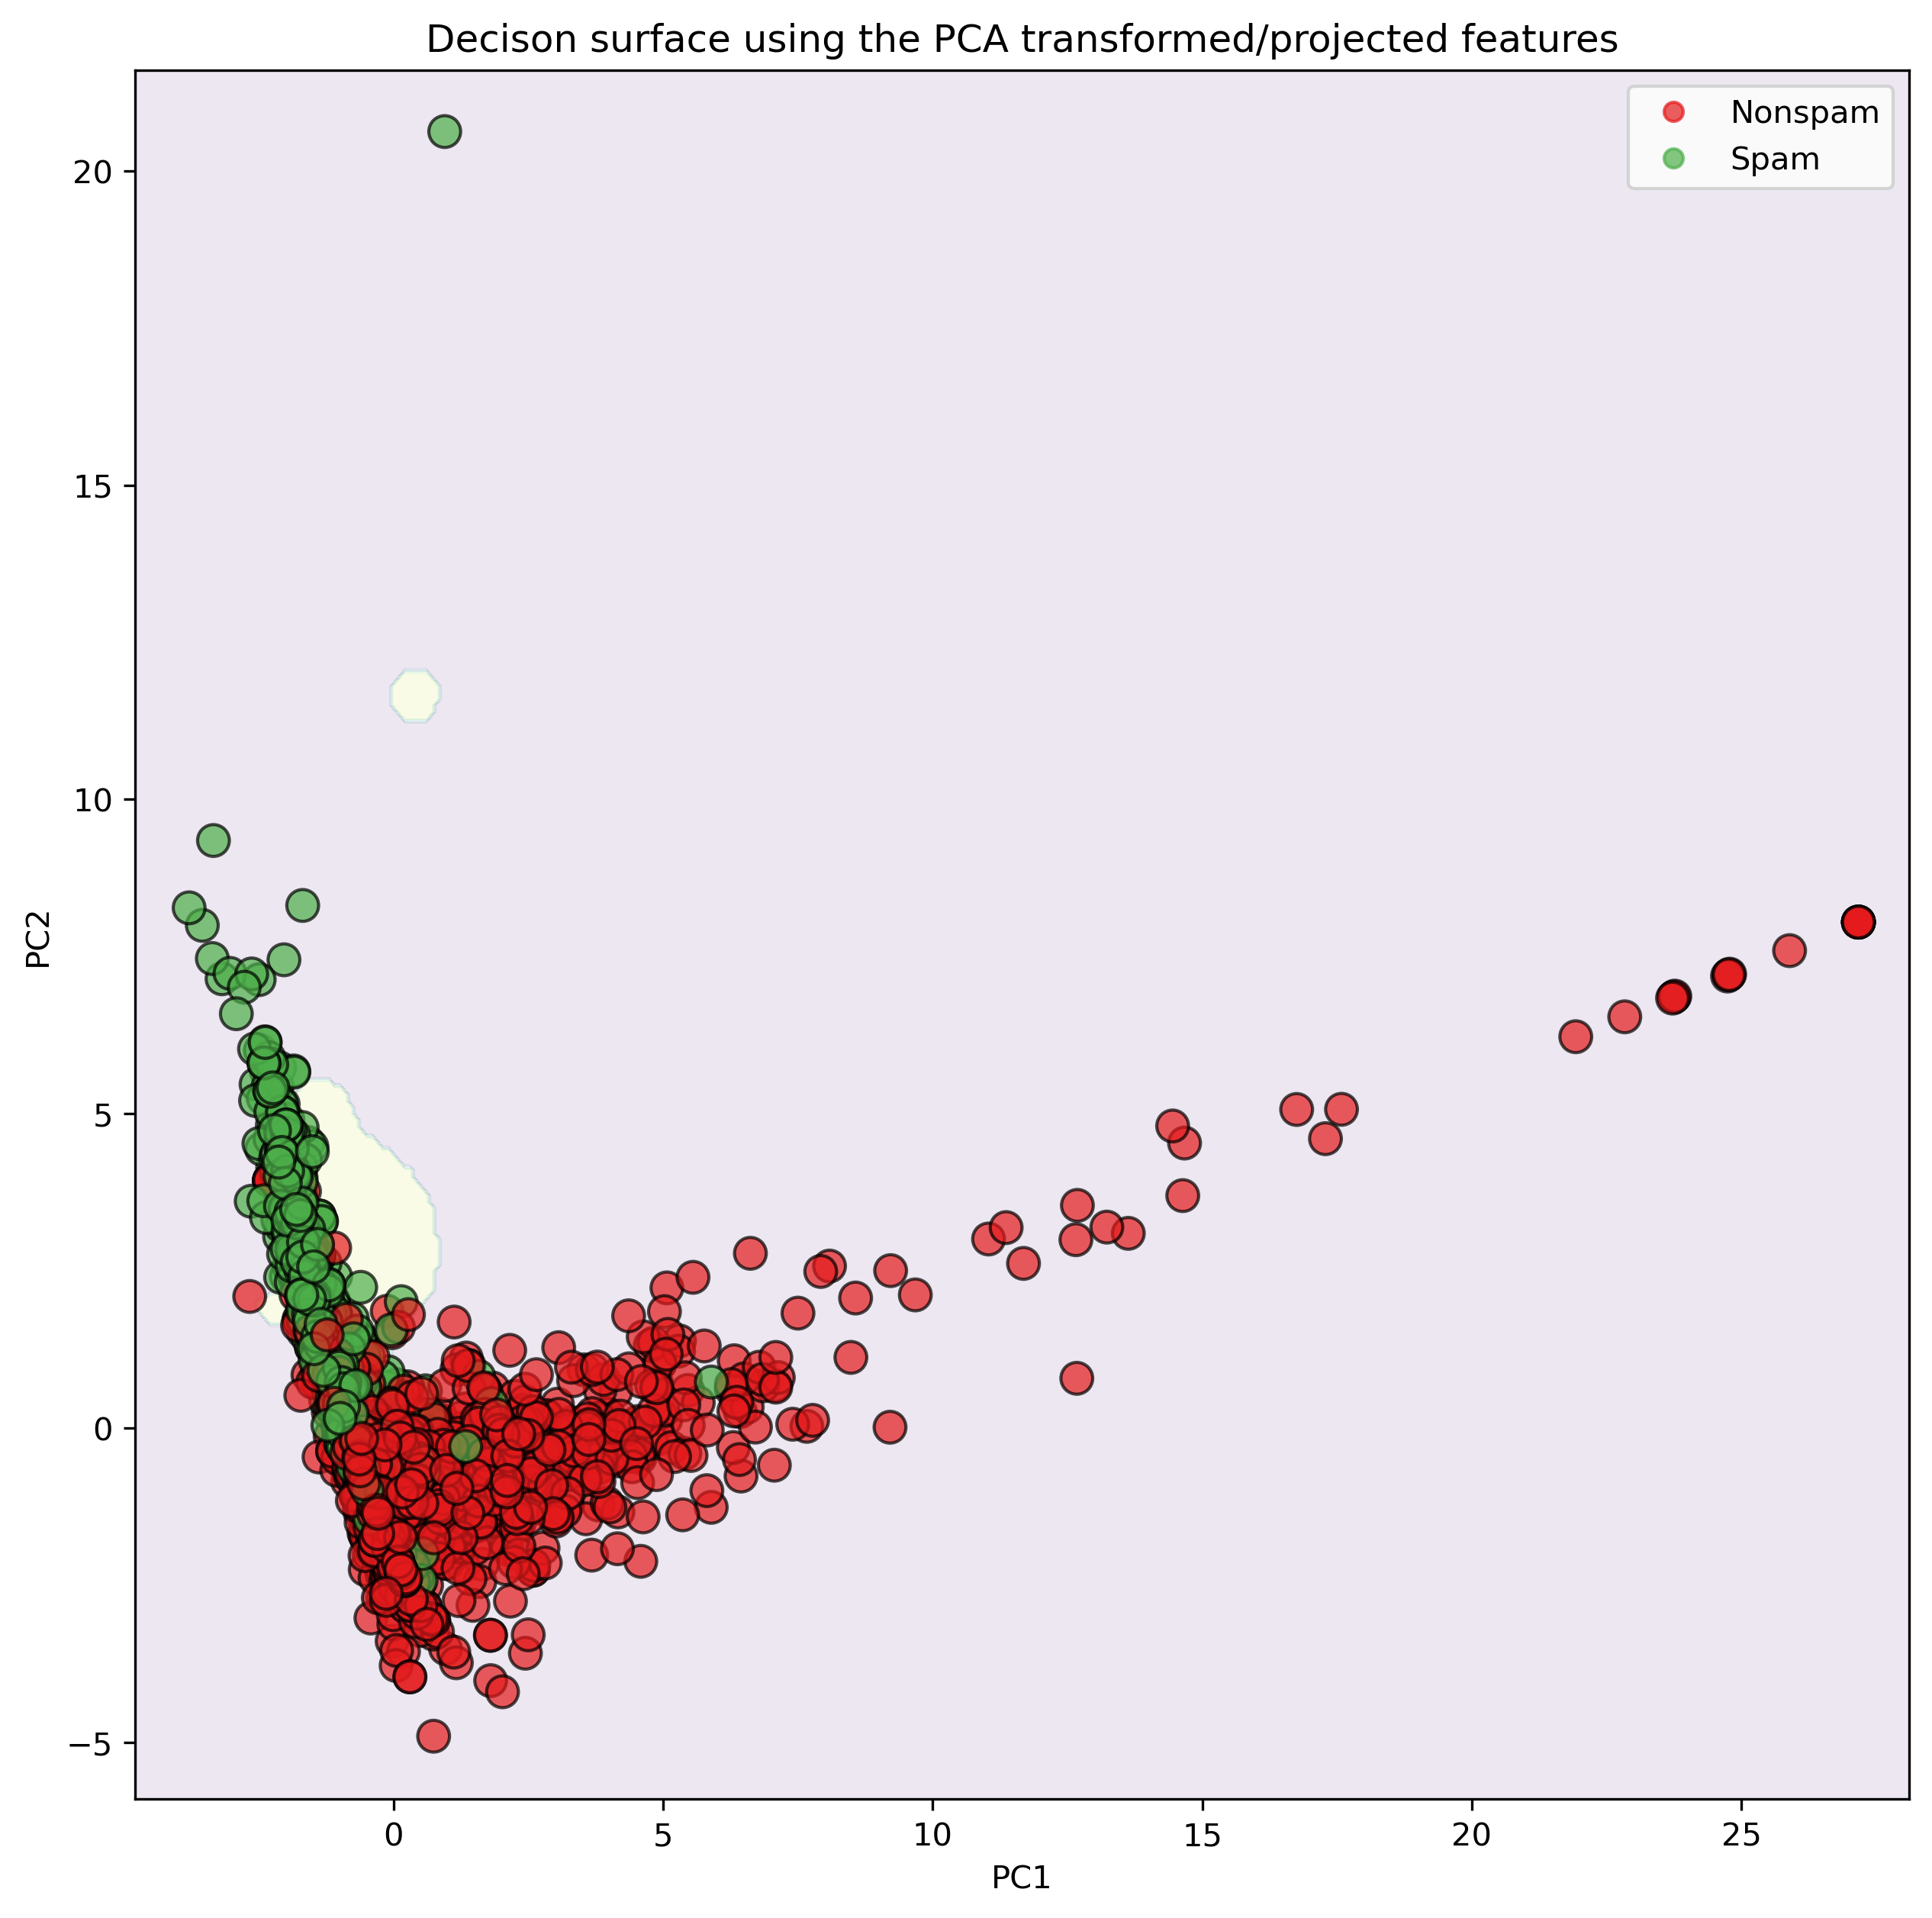

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Nonspam")
legend.get_texts()[1].set_text("Spam")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1') 
ax.set_title('Decison surface using the PCA transformed/projected features')
#plt.savefig('svm_default.png')
plt.show()
#purple is the decision boundary of nonspam and yellow is spam

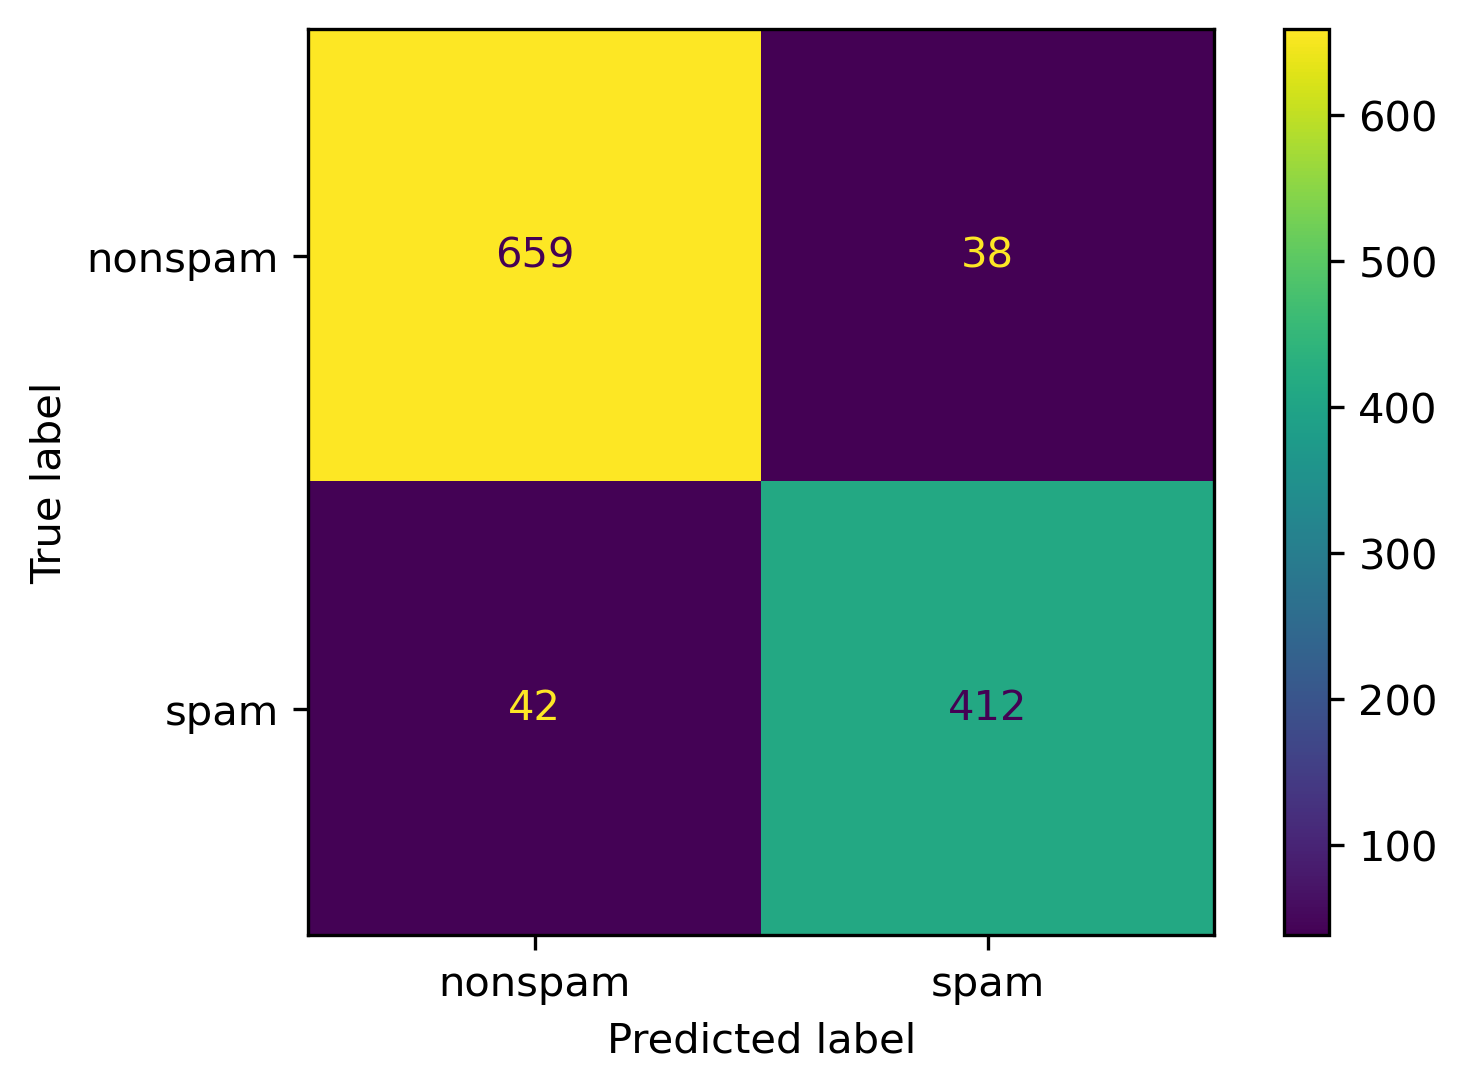

In [153]:
clf_lg = Lgr(random_state = 1)
clf_lg.fit(X_train, y_train)
plot_confusion_matrix(clf_lg, X_test, y_test, display_labels=["nonspam", "spam"])
             

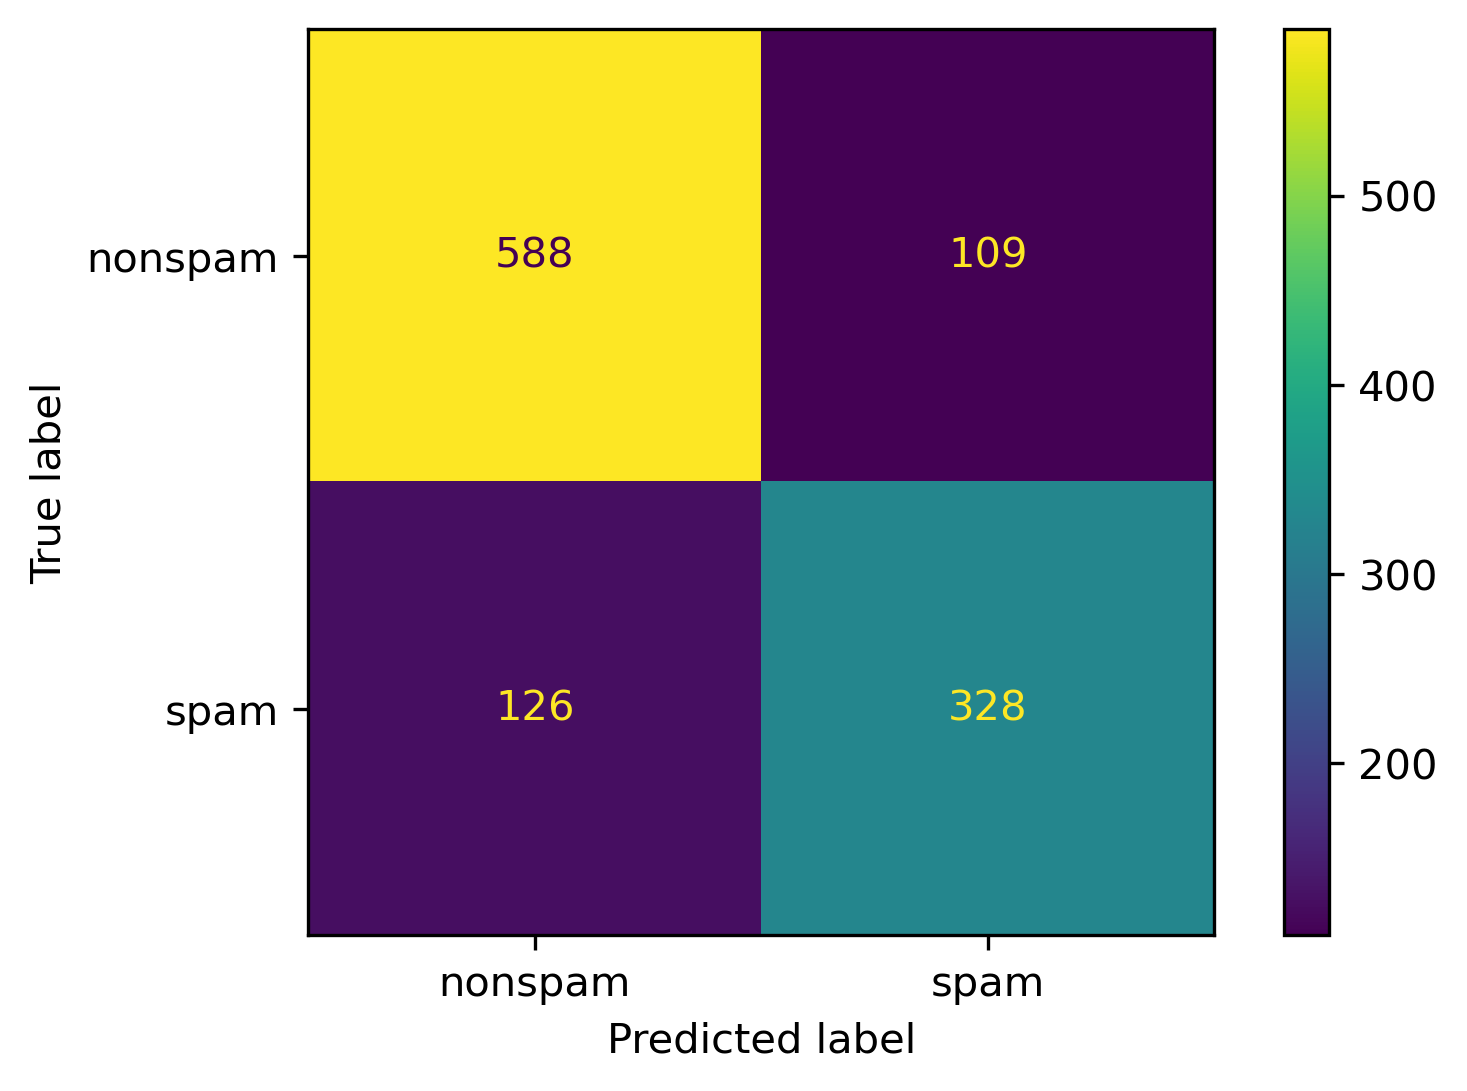

In [156]:
from sklearn.metrics import accuracy_score
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
plot_confusion_matrix(clf_mnb, X_test, y_test, display_labels=["nonspam", "spam"])

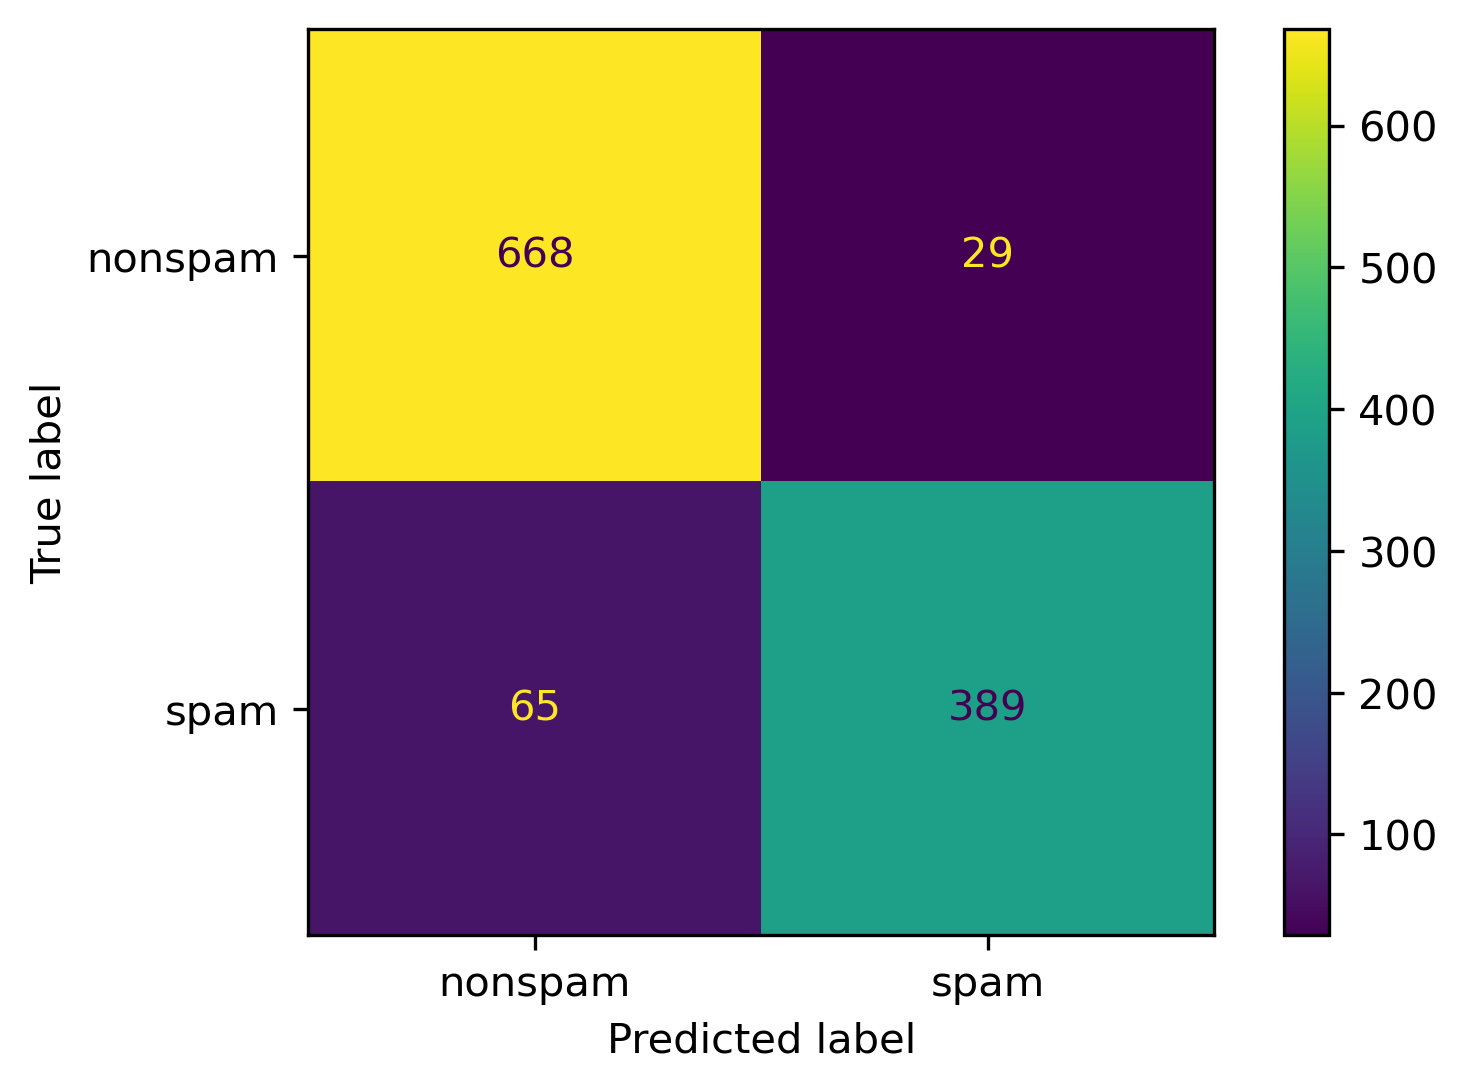

In [162]:
knn1 = KNeighborsClassifier(n_neighbors = 8).fit(X_train_scaled, y_train)
#knn1.get_params()
plot_confusion_matrix(knn1, X_test_scaled, y_test, display_labels=["nonspam", "spam"])

In [158]:
param_grid = [{'n_neighbors': np.arange(1, 10)}]
optimal_params = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, scoring = 'roc_auc')
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)#roc_auc better than accuracy

{'n_neighbors': 14}


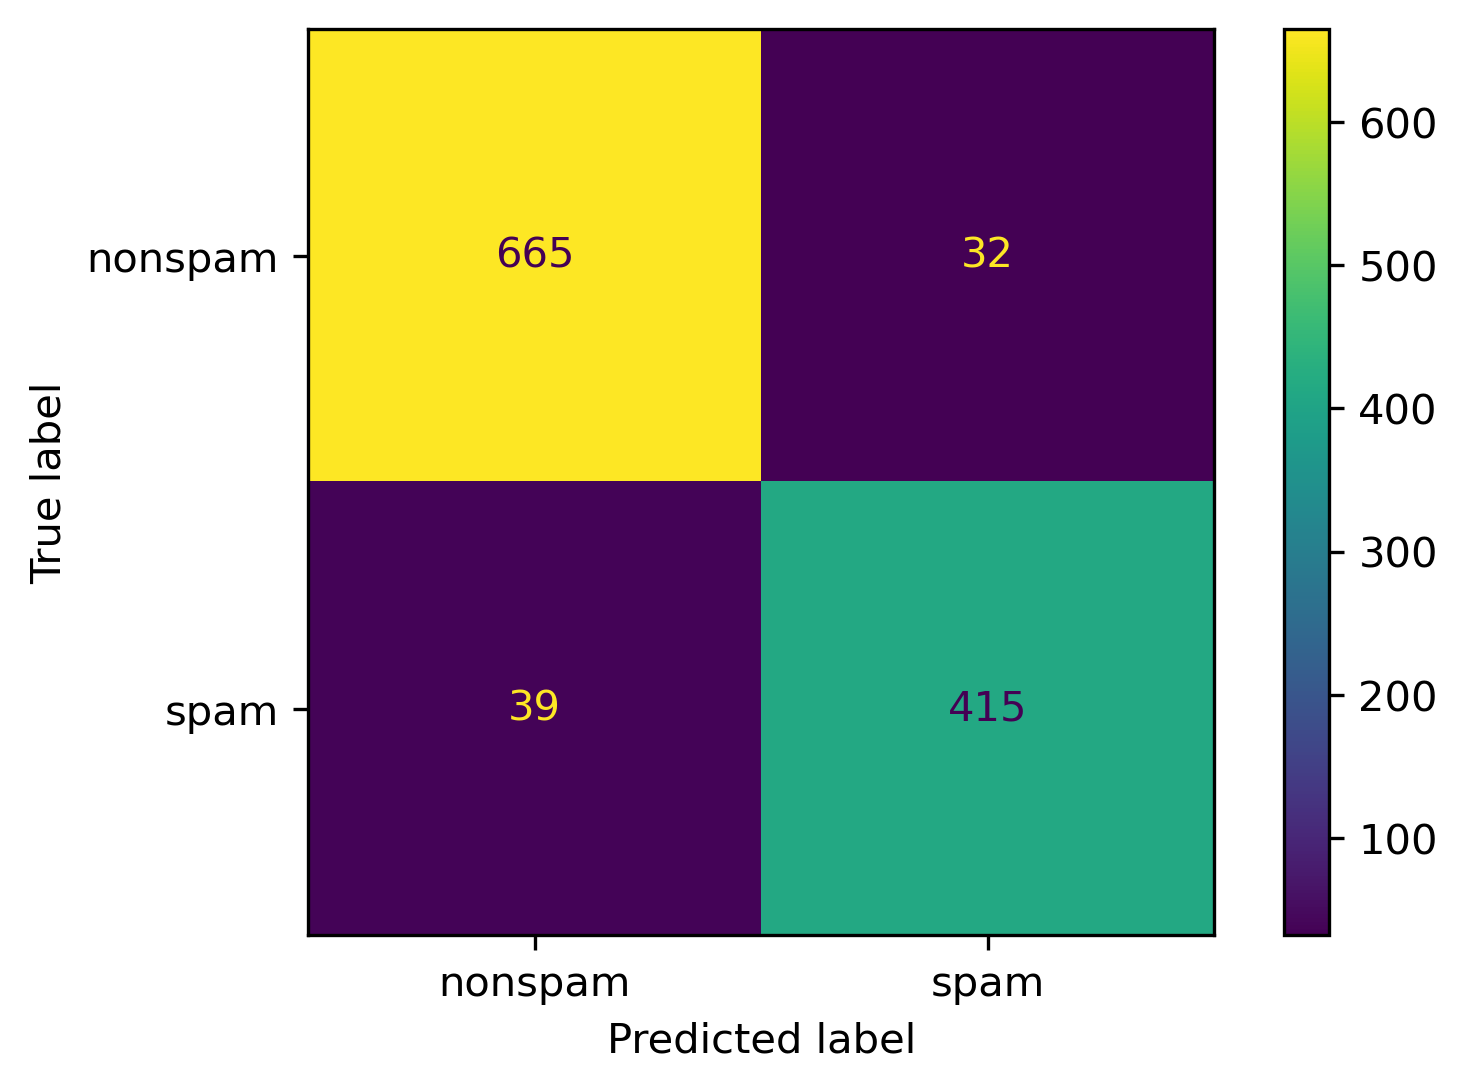

In [178]:
penalized_lr = Lgr(penalty='l2', solver='newton-cg')
penalized_lr.fit(X_train, y_train)
plot_confusion_matrix(penalized_lr, X_test, y_test, display_labels=["nonspam", "spam"])

In [172]:
param_grid = [{'l1_ratio': np.linspace(0, 0.5, 10)}]
optimal_params = GridSearchCV(Lgr(), param_grid, cv = 7, scoring = 'accuracy')
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)
#roc_auc and accuracy give the same l1_ratio, elasticnet is equivalent to lasso


{'l1_ratio': 0.0}


In [179]:
perm_importance = permutation_importance(penalized_lr, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

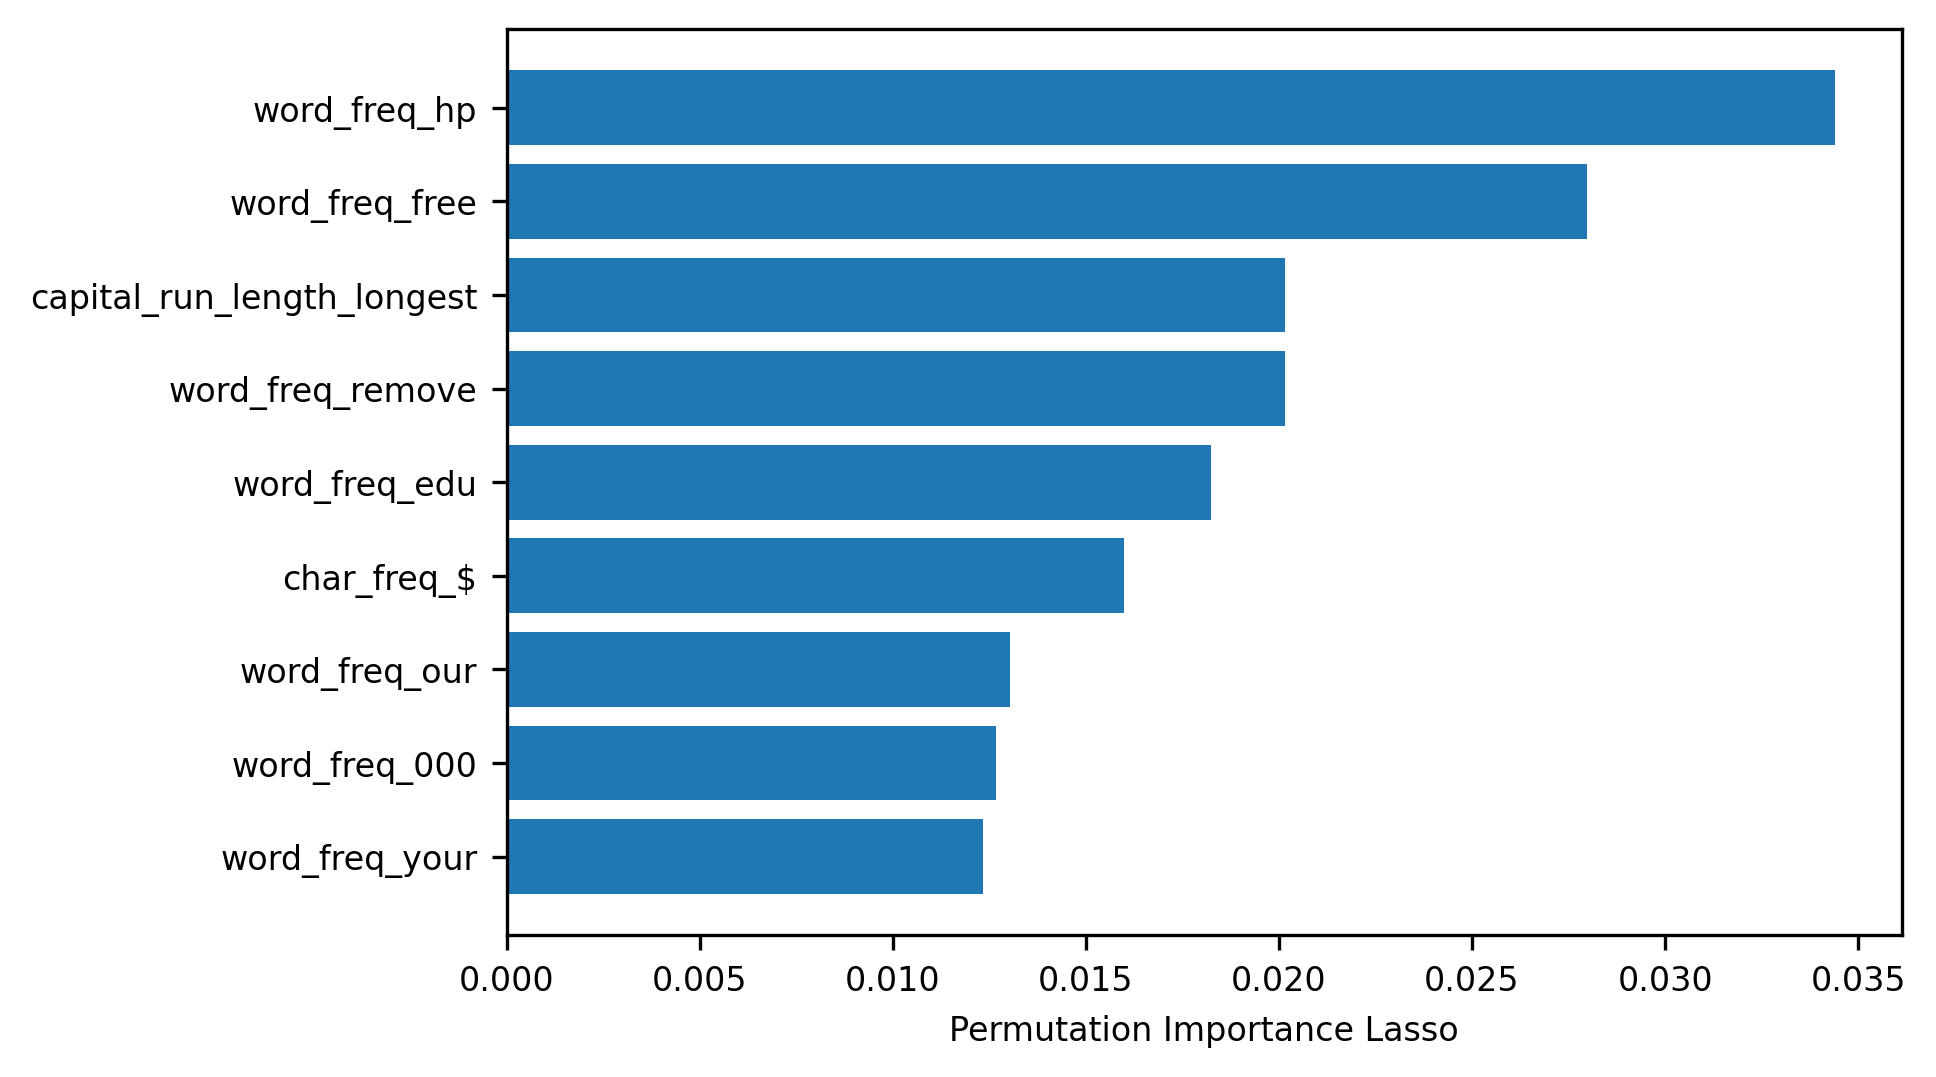

In [180]:
plt.barh(X_test.columns[sorted_idx[-10:-1]], perm_importance.importances_mean[sorted_idx[-10:-1]])
plt.xlabel("Permutation Importance Lasso", fontsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.tick_params(axis='x', labelsize=8)

In [205]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(max_iter=500, activation='relu', hidden_layer_sizes = (50,50), random_state = 1)
clf_mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=1)

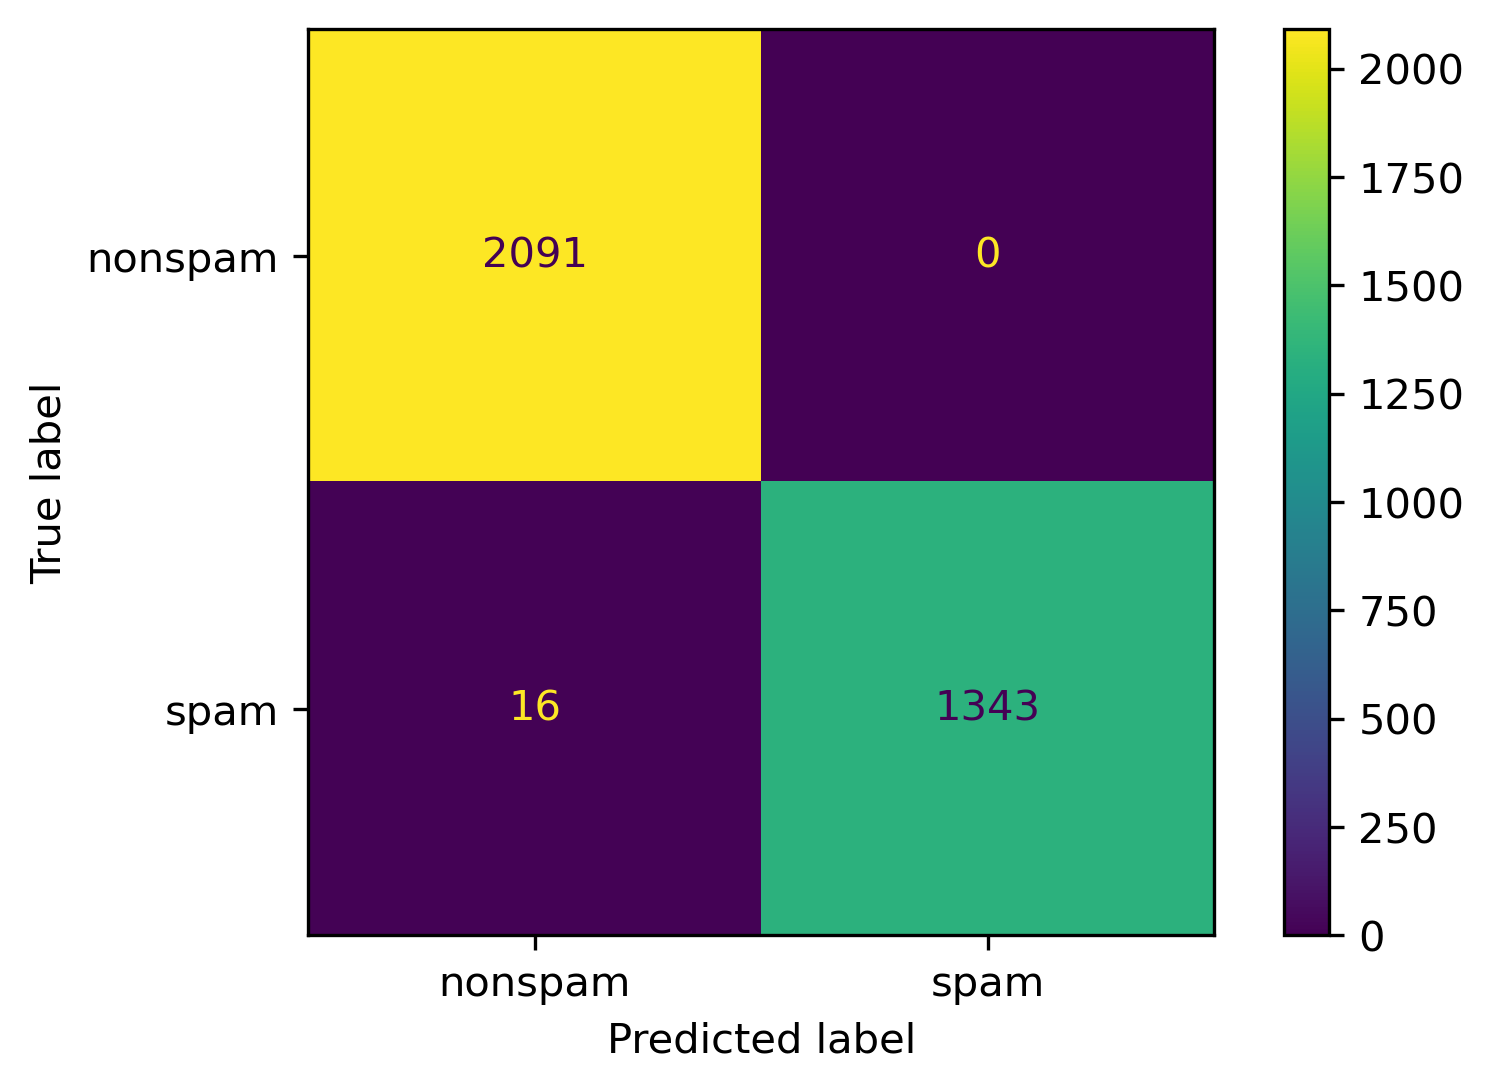

In [207]:
plot_confusion_matrix(clf_mlp, X_train_scaled, y_train, display_labels=["nonspam", "spam"])

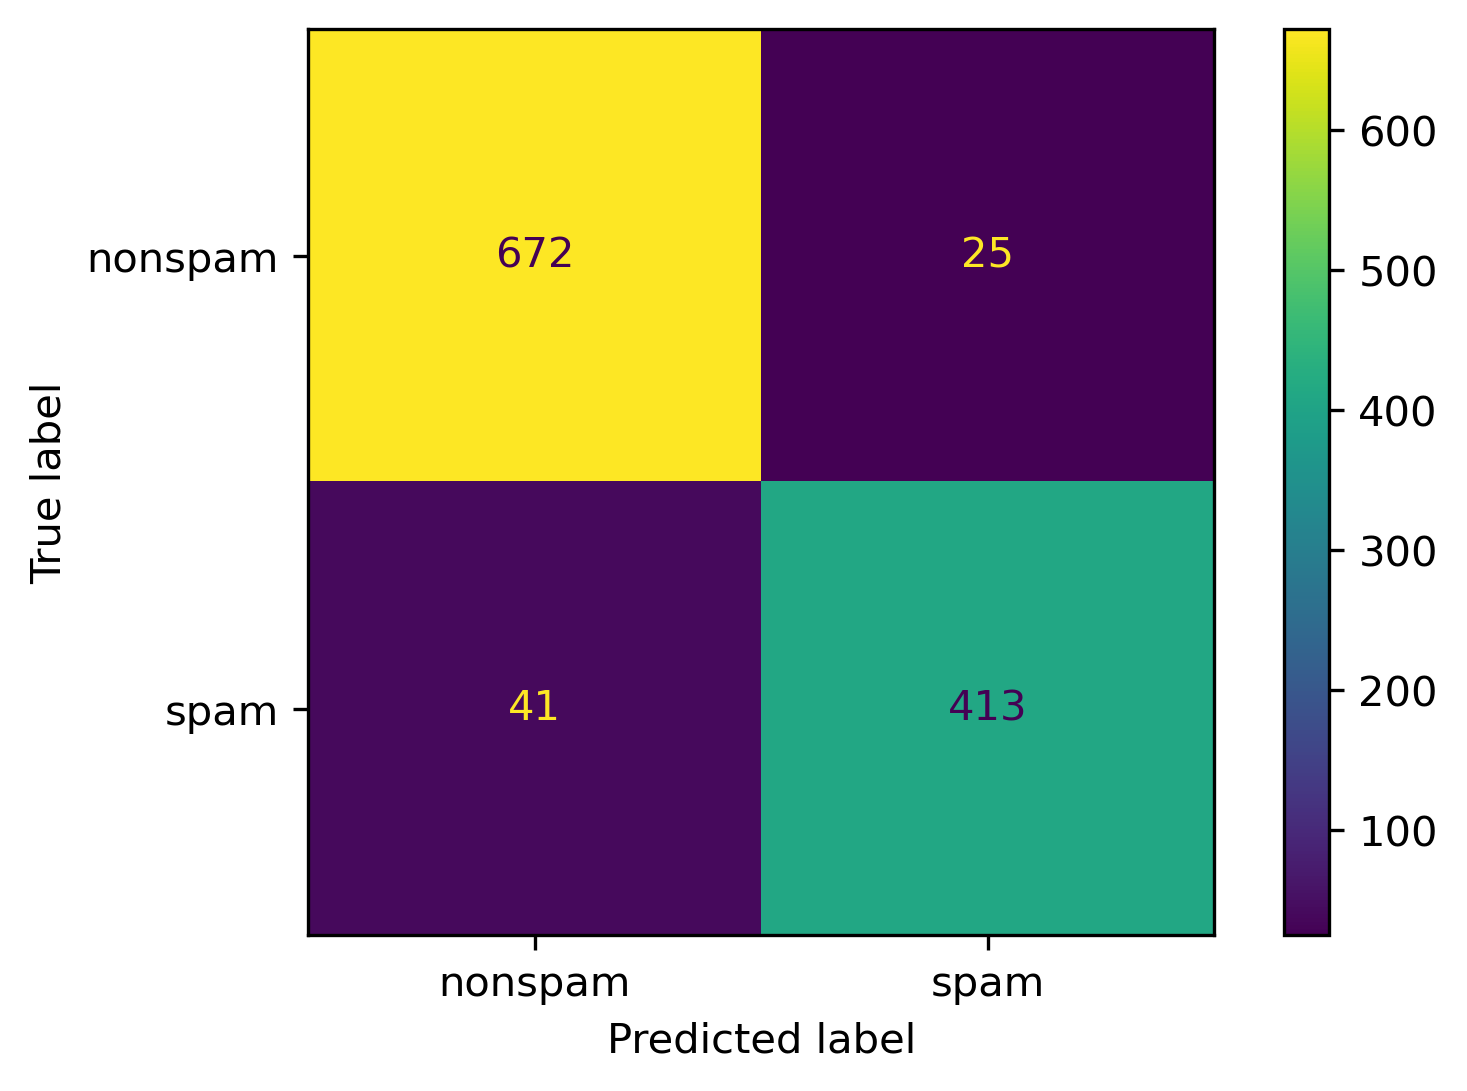

In [206]:
plot_confusion_matrix(clf_mlp, X_test_scaled, y_test, display_labels=["nonspam", "spam"])